### Setups

In [34]:
import pandas as pd
import numpy as np
import torch
import torchvision

## should 2.+ version
print(torch.__version__)
print(pd.__version__)

print(torchvision.__version__)

# rerun if you start server
# !pip install torch --upgrade
# !pip install pandas --upgrade
# !pip install torchvision --upgrade


2.6.0+cu124
2.2.3
0.21.0+cu124


In [2]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

# Define device
if cuda_available:
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs: {num_gpus}")

    # List all GPU devices
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")

    # Get current GPU
    current_gpu = torch.cuda.current_device()
    print(f"Current GPU index: {current_gpu}, Name: {torch.cuda.get_device_name(current_gpu)}")

    # Set desired GPU
    desired_gpu = 0  # Change based on preference
    if desired_gpu < num_gpus:
        torch.cuda.set_device(desired_gpu)
        device = torch.device(f"cuda:{desired_gpu}")
        print(f"Set to use GPU {desired_gpu}: {torch.cuda.get_device_name(desired_gpu)}")
    else:
        print(f"Desired GPU index {desired_gpu} is not available. Using GPU 0.")
        torch.cuda.set_device(0)
        device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No CUDA-capable GPU found. Running on CPU.")

device

CUDA available: True
Number of GPUs: 2
GPU 0: NVIDIA RTX A6000
GPU 1: NVIDIA RTX A6000
Current GPU index: 0, Name: NVIDIA RTX A6000
Set to use GPU 0: NVIDIA RTX A6000


device(type='cuda', index=0)

### tabular data

In [35]:
!ls pediatric

app_data.xlsx	 multiple_in_one_  test		       US_Pictures
deepfill_test	 outputs	   test_set_codes.csv  US_Pictures.zip
files-archive	 preprocessed	   train
multiple_in_one  README.md	   untitled.jl


In [36]:
!pip install openpyxl --upgrade

In [37]:
excel_file = 'pediatric/app_data.xlsx'
tabular_data = pd.read_excel(excel_file)

In [38]:
us_list = [22, 23, 541, 53, 59, 574, 576, 582, 76, 594, 94, 608, 102, 618, 627, 630, 632, 649, 650, 662, 666, 669, 673, 676, 677, 678, 679, 680, 684, 692, 694, 713, 719, 726, 729, 741, 230, 742, 747, 248, 762, 764, 767, 773, 784, 785, 277, 792, 798, 296, 809, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 311, 824, 825, 826, 827, 829, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 858, 861, 862, 863, 864, 867, 870, 871, 872, 873, 874, 875, 876, 878, 879, 880, 881, 885, 899, 389, 391, 906, 907, 908, 912, 915, 919, 937, 941, 944, 960, 972, 979, 980, 985, 990]
len(us_list)

tab_list = [513, 2, 521, 527, 535, 536, 32, 36, 39, 40, 554, 561, 50, 568, 57, 58, 63, 71, 584, 596, 598, 600, 98, 612, 617, 110, 623, 112, 113, 633, 638, 127, 641, 131, 644, 134, 135, 136, 646, 648, 139, 140, 141, 142, 144, 146, 147, 148, 149, 150, 664, 155, 667, 163, 165, 166, 167, 172, 689, 183, 696, 698, 704, 193, 194, 708, 714, 715, 717, 206, 718, 722, 725, 214, 217, 218, 219, 733, 737, 228, 229, 743, 234, 235, 236, 237, 241, 753, 245, 246, 247, 757, 760, 251, 765, 254, 257, 258, 772, 261, 262, 263, 264, 265, 779, 780, 273, 787, 789, 281, 795, 292, 293, 301, 303, 306, 307, 314, 318, 320, 325, 328, 333, 337, 343, 347, 360, 367, 369, 371, 372, 883, 375, 889, 378, 381, 384, 385, 386, 387, 388, 897, 390, 392, 394, 395, 396, 398, 400, 402, 914, 404, 917, 406, 407, 409, 410, 413, 414, 418, 931, 423, 424, 425, 427, 428, 431, 433, 434, 436, 437, 438, 948, 440, 959, 448, 961, 967, 968, 986, 482, 489, 495]

us_numbers = tabular_data['US_Number']
set(us_list).intersection(tabular_data['US_Number'].values)


set()

In [39]:
print(len(tabular_data['US_Number']))

782


In [40]:
tabular_data[tabular_data['Age'].notna() & tabular_data['BMI'].isna()]

Age  BMI     Sex  Height  Weight  Length_of_Stay  \
7     7.060000  NaN  female     NaN    21.5             2.0   
27   17.820000  NaN  female     NaN    52.0             2.0   
34   11.400000  NaN    male     NaN    45.0             3.0   
36    5.710000  NaN    male     NaN    19.5             2.0   
37   14.150000  NaN    male     NaN    50.0             3.0   
40   15.900000  NaN  female     NaN    54.0             3.0   
49   15.720000  NaN  female     NaN    52.0             3.0   
70    9.100000  NaN    male     NaN    25.0             3.0   
76   12.680000  NaN  female     NaN    39.0             3.0   
83   14.230000  NaN    male     NaN    54.0             4.0   
90    8.830000  NaN    male     NaN    33.8             3.0   
137   5.160000  NaN    male     NaN    23.0             3.0   
163  14.160000  NaN    male     NaN    75.0             3.0   
183  10.950000  NaN    male     NaN    36.0             3.0   
199  13.830000  NaN    male     NaN    48.0             3.0   
490   5.830000  NaN    male     NaN    20.5             8.0   
495  12.990000  NaN  female     NaN    50.0             8.0   
499  18.360000  NaN  female     NaN     NaN             4.0   
524   7.420000  NaN  female     NaN    25.0             5.0   
550  16.990000  NaN  female   168.0    59.0             6.0   
564   7.530000  NaN    male     NaN    23.3             7.0   
579   8.470000  NaN    male     NaN    24.0             5.0   
593   7.810000  NaN    male     NaN    23.0             9.0   
645  13.190000  NaN    male     NaN    43.5             8.0   
730  14.970000  NaN  female     NaN    52.0             NaN   
750  13.368925  NaN    male     NaN     NaN             3.0   

             Management       Severity Diagnosis_Presumptive        Diagnosis  \
7          conservative  uncomplicated          appendicitis  no appendicitis   
27         conservative  uncomplicated          appendicitis  no appendicitis   
34         conservative  uncomplicated          appendicitis     appendicitis   
36         conservative  uncomplicated          appendicitis     appendicitis   
37         conservative  uncomplicated          appendicitis  no appendicitis   
40         conservative  uncomplicated          appendicitis     appendicitis   
49         conservative  uncomplicated          appendicitis  no appendicitis   
70         conservative  uncomplicated          appendicitis  no appendicitis   
76         conservative  uncomplicated          appendicitis     appendicitis   
83         conservative  uncomplicated          appendicitis     appendicitis   
90         conservative  uncomplicated          appendicitis     appendicitis   
137        conservative  uncomplicated          appendicitis     appendicitis   
163        conservative  uncomplicated          appendicitis     appendicitis   
183        conservative  uncomplicated          appendicitis     appendicitis   
199        conservative  uncomplicated          appendicitis     appendicitis   
490    primary surgical    complicated          appendicitis     appendicitis   
495    primary surgical    complicated        Ovarialtorsion     appendicitis   
499  secondary surgical  uncomplicated          appendicitis     appendicitis   
524    primary surgical    complicated          appendicitis     appendicitis   
550    primary surgical    complicated          appendicitis     appendicitis   
564    primary surgical    complicated          appendicitis     appendicitis   
579    primary surgical  uncomplicated          appendicitis     appendicitis   
593    primary surgical  uncomplicated          appendicitis     appendicitis   
645    primary surgical  uncomplicated          appendicitis     appendicitis   
730  secondary surgical  uncomplicated          appendicitis     appendicitis   
750  secondary surgical  uncomplicated          appendicitis     appendicitis   

     ...  Abscess_Location  Pathological_Lymph_Nodes Lymph_Nodes_Location  \
7    ...               NaN                  

In [41]:
tabular_data = tabular_data.dropna(subset=['US_Number'])
tabular_data.describe()

Age         BMI      Height      Weight  Length_of_Stay  \
count  760.000000  737.000000  738.000000  759.000000      759.000000   
mean    11.315944   18.894767  148.041057   43.143162        4.270092   
std      3.509136    4.380561   19.779393   17.408210        2.583087   
min      0.000000    7.827983   53.000000    3.960000        1.000000   
25%      9.228131   15.733131  137.125000   29.500000        3.000000   
50%     11.408624   18.000000  149.500000   41.000000        3.000000   
75%     13.963172   21.097947  163.000000   54.350000        5.000000   
max     17.872690   38.156221  192.000000  103.000000       28.000000   

       Alvarado_Score  Paedriatic_Appendicitis_Score  Appendix_Diameter  \
count      712.000000                     712.000000         488.000000   
mean         5.928371                       5.254213           7.766393   
std          2.159383                       1.962012           2.546048   
min          0.000000                       0.000000           2.700000   
25%          4.000000                       4.000000           6.000000   
50%          6.000000                       5.000000           7.500000   
75%          8.000000                       7.000000           9.100000   
max         10.000000                      10.000000          17.000000   

       Body_Temperature   WBC_Count  Neutrophil_Percentage  \
count        755.000000  755.000000             662.000000   
mean          37.415364   12.688543              71.950151   
std            0.908581    5.384662              14.390518   
min           26.900000    2.600000              27.200000   
25%           36.800000    8.300000              61.500000   
50%           37.200000   12.000000              75.900000   
75%           37.900000   16.200000              83.600000   
max           40.200000   37.700000              97.700000   

       Segmented_Neutrophils   RBC_Count  Hemoglobin         RDW  \
count              52.000000  743.000000  743.000000  735.000000   
mean               64.369231    4.800969   13.378600   13.184082   
std                15.078325    0.502933    1.400832    4.600397   
min                32.000000    3.620000    8.200000   11.200000   
25%                54.000000    4.540000   12.600000   12.300000   
50%                63.500000    4.780000   13.300000   12.700000   
75%                75.000000    5.020000   14.000000   13.300000   
max                91.000000   14.000000   36.000000   86.900000   

       Thrombocyte_Count         CRP   US_Number  
count         743.000000  751.000000  760.000000  
mean          284.834455   31.375593  425.515789  
std            71.110167   57.233699  271.585211  
min            91.000000    0.000000    1.000000  
25%           236.000000    1.000000  198.750000  
50%           276.000000    7.000000  398.500000  
75%           330.000000   33.000000  613.250000  
max           546.000000  365.000000  992.000000

In [42]:
#impute bmi from formula directly if w,h data available
tabular_data['BMI'] = tabular_data.apply(lambda x: x['Weight'] / ((x['Height'] / 100) ** 2) if x['Weight'] and x['Height'] else None, axis=1)

In [43]:
tabular_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               760 non-null    float64
 1   BMI                               738 non-null    float64
 2   Sex                               759 non-null    object 
 3   Height                            738 non-null    float64
 4   Weight                            759 non-null    float64
 5   Length_of_Stay                    759 non-null    float64
 6   Management                        760 non-null    object 
 7   Severity                          760 non-null    object 
 8   Diagnosis_Presumptive             759 non-null    object 
 9   Diagnosis                         759 non-null    object 
 10  Alvarado_Score                    712 non-null    float64
 11  Paedriatic_Appendicitis_Score     712 non-null    float64
 12  Appendix_on_U

In [44]:
#drop US images findings
columns_to_drop = [
    "US_Performed", "Appendix_on_US", "Appendix_Diameter", "Free_Fluids", "Appendix_Wall_Layers",
    "Target_Sign", "Perfusion", "Surrounding_Tissue_Reaction", "Pathological_Lymph_Nodes",
    "Bowel_Wall_Thickening", "Ileus", "Coprostasis", "Meteorism", "Enteritis",
    "Appendicolith", "Perforation", "Appendicular_Abscess", "Abscess_Location", "Conglomerate_of_Bowel_Loops",
    "Gynecological_Findings", "Lymph_Nodes_Location","Diagnosis_Presumptive", "Management", "Severity" ,"Length_of_Stay",
]

df = tabular_data.drop(columns=columns_to_drop)
#Gynecological_Findings
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 781
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               760 non-null    float64
 1   BMI                               738 non-null    float64
 2   Sex                               759 non-null    object 
 3   Height                            738 non-null    float64
 4   Weight                            759 non-null    float64
 5   Diagnosis                         759 non-null    object 
 6   Alvarado_Score                    712 non-null    float64
 7   Paedriatic_Appendicitis_Score     712 non-null    float64
 8   Migratory_Pain                    754 non-null    object 
 9   Lower_Right_Abd_Pain              754 non-null    object 
 10  Contralateral_Rebound_Tenderness  748 non-null    object 
 11  Coughing_Pain                     747 non-null    object 
 12  Nausea       

<AxesSubplot: xlabel='Diagnosis'>

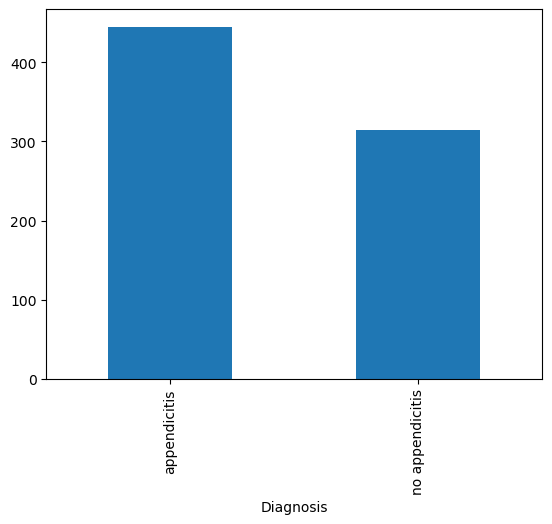

In [45]:
df['Diagnosis'].value_counts().plot(kind='bar')

## [skip into multimodal]

In [45]:
import pprint

In [46]:
df['Ketones_in_Urine'].value_counts()

Ketones_in_Urine
no     324
+++    123
+       72
++      49
Name: count, dtype: int64

In [47]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer

def analyze_missing_values(df, target_col='Diagnosis', exclude_cols=['US_number']):
    """
    Analyze missing values excluding target variable and irrelevant columns
    """
    # Remove target and excluded columns from analysis
    analysis_df = df.copy()
    
    # Calculate missing value statistics
    total_cells = np.product(analysis_df.shape)
    total_missing = analysis_df.isnull().sum().sum()
    
    # Create missing value summary
    missing_summary = pd.DataFrame({
        'Total_Missing': analysis_df.isnull().sum(),
        'Percent_Missing': (analysis_df.isnull().sum() / len(analysis_df) * 100).round(2)
    }).sort_values('Percent_Missing', ascending=False)
    
    # Identify columns by data type
    numeric_columns = analysis_df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = analysis_df.select_dtypes(include=['object']).columns
    
    return {
        'total_missing_percentage': (total_missing/total_cells * 100).round(2),
        'missing_summary': missing_summary,
        'numeric_columns': numeric_columns,
        'categorical_columns': categorical_columns
    }




    
    

def prepare_imputation_pipeline(train_df, test_df=None):
    """
    Prepare and fit imputation pipeline on training data, transform both train and test
    """
    # Remove target and excluded columns
    X_train = train_df.copy()
    X_test = test_df.copy()
    
    # Separate numeric and categorical columns
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = X_train.select_dtypes(include=['object']).columns
    
    # Initialize imputers
    numeric_imputer = IterativeImputer(
        random_state=42,
        max_iter=10,
        initial_strategy='median'
    )
    
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    
    # Fit and transform training data
    X_train_num_imputed = pd.DataFrame(
        numeric_imputer.fit_transform(X_train[numeric_columns]),
        columns=numeric_columns,
        index=X_train.index
    )
    
    X_train_cat_imputed = pd.DataFrame(
        categorical_imputer.fit_transform(X_train[categorical_columns]),
        columns=categorical_columns,
        index=X_train.index
    )
    
    # Combine imputed data
    X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
    
    # Transform test data if provided
    X_test_imputed = None
    if X_test is not None:
        X_test_num_imputed = pd.DataFrame(
            numeric_imputer.transform(X_test[numeric_columns]),
            columns=numeric_columns,
            index=X_test.index
        )
        
        X_test_cat_imputed = pd.DataFrame(
            categorical_imputer.transform(X_test[categorical_columns]),
            columns=categorical_columns,
            index=X_test.index
        )
        
        X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)
    
    return X_train_imputed, X_test_imputed, numeric_imputer, categorical_imputer

# Split data into train and test
df = df[~df['Stool'].str.contains(",", na=False)]

y = df['Diagnosis']
columns = ['Diagnosis', 'US_Number']
print(df.columns.isin(columns).sum())
X = df.drop(columns=columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analyze missing values
analysis_results = analyze_missing_values(X_train)

pprint.pprint(analysis_results)


def prepare_knn_imputation_pipeline(train_df, test_df=None, n_neighbors=5):
    """
    Prepare and fit imputation pipeline using KNNImputer for numeric data
    and SimpleImputer for categorical data.
    
    Parameters:
    -----------
    train_df : pandas DataFrame
        Training data with missing values
    test_df : pandas DataFrame, optional
        Test data with missing values
    n_neighbors : int, default=5
        Number of neighbors to use for KNN imputation
        
    Returns:
    --------
    X_train_imputed : pandas DataFrame
        Training data with imputed values
    X_test_imputed : pandas DataFrame or None
        Test data with imputed values (if test_df provided)
    numeric_imputer : sklearn.impute.KNNImputer
        Fitted numeric imputer
    categorical_imputer : sklearn.impute.SimpleImputer
        Fitted categorical imputer
    """
    from sklearn.impute import KNNImputer, SimpleImputer
    import pandas as pd
    
    # Create copies to avoid modifying original data
    X_train = train_df.copy()
    X_test = test_df.copy() if test_df is not None else None
    
    # Separate numeric and categorical columns
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = X_train.select_dtypes(include=['object']).columns
    
    # Initialize imputers
    numeric_imputer = KNNImputer(
        n_neighbors=n_neighbors,
        weights='uniform',
        metric='nan_euclidean'
    )
    
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    
    # Fit and transform training data
    X_train_num_imputed = pd.DataFrame(
        numeric_imputer.fit_transform(X_train[numeric_columns]),
        columns=numeric_columns,
        index=X_train.index
    )
    
    X_train_cat_imputed = pd.DataFrame(
        categorical_imputer.fit_transform(X_train[categorical_columns]),
        columns=categorical_columns,
        index=X_train.index
    )
    
    # Combine imputed data
    X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
    
    # Transform test data if provided
    X_test_imputed = None
    if X_test is not None:
        X_test_num_imputed = pd.DataFrame(
            numeric_imputer.transform(X_test[numeric_columns]),
            columns=numeric_columns,
            index=X_test.index
        )
        
        X_test_cat_imputed = pd.DataFrame(
            categorical_imputer.transform(X_test[categorical_columns]),
            columns=categorical_columns,
            index=X_test.index
        )
        
        X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)
    
    return X_train_imputed, X_test_imputed, numeric_imputer, categorical_imputer


# Impute values
X_train_imputed, X_test_imputed, num_imputer, cat_imputer = prepare_knn_imputation_pipeline(
    X_train, X_test
)


2
{'categorical_columns': Index(['Sex', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness'],
      dtype='object'),
 'missing_summary':                                   Total_Missing  Percent_Missing
Segmented_Neutrophils                       562            92.59
RBC_in_Urine                                151            24.88
WBC_in_Urine                                146            24.05
Ketones_in_Urine                            146            24.05
Ipsilateral_Rebound_Tenderness              120            19.77
Neutrophil_Percentage                        82            13.51
Paedriatic_Appendicitis_Score                38             6.26
Neutrophilia                                 38             6.26
Alvarado_Score             

In [48]:
def handle_categorical(df):
    df = df.copy()
    handlers = {
        'Sex': lambda x: 1 if x.lower() == 'female' else 0,
        'Peritonitis': lambda x: {'no': 0, 'local': 1, 'generalized': 2}.get(x, np.nan),
        'Psoas_Sign': lambda x: 1 if x.lower() == 'positive' else 0,
        'Ketones_in_Urine': lambda x: {'no': 0, '+': 1, '++': 2, '+++': 3}.get(x, np.nan),
        'WBC_in_Urine': lambda x: {'no': 0, '+': 1, '++': 2, '+++': 3}.get(x, np.nan),
        'RBC_in_Urine': lambda x: {'no': 0, '+': 1, '++': 2, '+++': 3}.get(x, np.nan),
    }
    
    # Binary yes/no encoding
    binary_features = [
        'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
        'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Dysuria',
        'Ipsilateral_Rebound_Tenderness'
    ]
    
    for feature in binary_features:
        if feature in df:
            df[feature] = df[feature].apply(lambda x: 1 if x.lower() == 'yes' else 0)
    
    for feature, handler in handlers.items():
        print(f'handling feature {feature}')
        if feature in df:
            df[feature] = df[feature].apply(handler)
    
    if 'Stool' in df:
        print("Handling Stool column")
        
        # Normalize values (convert to lowercase)
        df['Stool'] = df['Stool'].astype(str).str.lower()
        
        # One-hot encode the Stool column
        stool_dummies = pd.get_dummies(df['Stool'], prefix='Stool')
        
        # Drop the original Stool column and join the dummies
        df = df.drop(columns=['Stool']).join(stool_dummies)
    
   
    
    return df

#prepare for rf training by transforming features
X_train_transformed = handle_categorical(X_train_imputed)
X_test_transformed = handle_categorical(X_test_imputed)


handling feature Sex
handling feature Peritonitis
handling feature Psoas_Sign
handling feature Ketones_in_Urine
handling feature WBC_in_Urine
handling feature RBC_in_Urine
Handling Stool column
handling feature Sex
handling feature Peritonitis
handling feature Psoas_Sign
handling feature Ketones_in_Urine
handling feature WBC_in_Urine
handling feature RBC_in_Urine
Handling Stool column


In [49]:
print(X_train_transformed.shape, y_train.shape)

(607, 33) (607,)


In [50]:
print(X_test_transformed.shape, y_test.shape)

(152, 33) (152,)


In [51]:
X_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 399 to 337
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               152 non-null    float64
 1   BMI                               152 non-null    float64
 2   Height                            152 non-null    float64
 3   Weight                            152 non-null    float64
 4   Alvarado_Score                    152 non-null    float64
 5   Paedriatic_Appendicitis_Score     152 non-null    float64
 6   Body_Temperature                  152 non-null    float64
 7   WBC_Count                         152 non-null    float64
 8   Neutrophil_Percentage             152 non-null    float64
 9   Segmented_Neutrophils             152 non-null    float64
 10  RBC_Count                         152 non-null    float64
 11  Hemoglobin                        152 non-null    float64
 12  RDW        

In [52]:

#validate imputation
def validate_imputation(original_df, imputed_df):
    """
    Validate the imputation results for both numerical and categorical features.
    """
    validation_results = pd.DataFrame({
        'Original_Missing': original_df.isnull().sum(),
        'Post_Imputation_Missing': imputed_df.isnull().sum(),
        'Original_Mean': original_df.mean(numeric_only=True),
        'Imputed_Mean': imputed_df.mean(numeric_only=True),
        'Original_Mode': original_df.select_dtypes(include=['object']).mode().iloc[0],
        'Imputed_Mode': imputed_df.select_dtypes(include=['object']).mode().iloc[0]
    })
    
    return validation_results

validate_imputation(X_train, X_train_imputed)


Original_Missing  Post_Imputation_Missing  \
Age                                              0                        0   
Alvarado_Score                                  38                        0   
BMI                                             17                        0   
Body_Temperature                                 4                        0   
CRP                                              8                        0   
Contralateral_Rebound_Tenderness                 8                        0   
Coughing_Pain                                    8                        0   
Dysuria                                         15                        0   
Height                                          17                        0   
Hemoglobin                                      16                        0   
Ipsilateral_Rebound_Tenderness                 120                        0   
Ketones_in_Urine                               146                        0   
Loss_of_Appetite                                 5                        0   
Lower_Right_Abd_Pain                             3                        0   
Migratory_Pain                                   3                        0   
Nausea                                           4                        0   
Neutrophil_Percentage                           82                        0   
Neutrophilia                                    38                        0   
Paedriatic_Appendicitis_Score                   38                        0   
Peritonitis                                      4                        0   
Psoas_Sign                                      21                        0   
RBC_Count                                       16                        0   
RBC_in_Urine                                   151                        0   
RDW                                             23                        0   
Segmented_Neutrophils                          562                        0   
Sex                                              1                        0   
Stool                                           10                        0   
Thrombocyte_Count                               16                        0   
WBC_Count                                        5                        0   
WBC_in_Urine                                   146                        0   
Weight                                           1                        0   

                                  Original_Mean  Imputed_Mean Original_Mode  \
Age                                   11.311906     11.311906           NaN   
Alvarado_Score                         5.956063      5.944975           NaN   
BMI                                   18.744557     18.725966           NaN   
Body_Temperature                      37.407629     37.405107           NaN   
CRP                                   30.886093     30.896161           NaN   
Contralateral_Rebound_Tenderness            NaN           NaN            no   
Coughing_Pain                               NaN           NaN            no   
Dysuria                                     NaN           NaN            no   
Height                               147.792881    147.756507           NaN   
Hemoglobin                            13.348054     13.346129           NaN   
Ipsilateral_Rebound_Tenderness              NaN           NaN            no   
Ketones_in_Urine                            NaN           NaN            no   
Loss_of_Appetite                            NaN           NaN           yes   
Lower_Right_Abd_Pain                        NaN           NaN           yes   
Migratory_Pain                              NaN           NaN            no   
Nausea                                      NaN           NaN           yes   
Neutrophil_Percentage                 71.752571     71.665502           NaN   
Neutrophilia                                NaN           NaN            no   
Paed

In [53]:
validate_imputation(X_test, X_test_imputed)

Original_Missing  Post_Imputation_Missing  \
Age                                              0                        0   
Alvarado_Score                                  10                        0   
BMI                                              5                        0   
Body_Temperature                                 1                        0   
CRP                                              1                        0   
Contralateral_Rebound_Tenderness                 4                        0   
Coughing_Pain                                    5                        0   
Dysuria                                         11                        0   
Height                                           5                        0   
Hemoglobin                                       1                        0   
Ipsilateral_Rebound_Tenderness                  33                        0   
Ketones_in_Urine                                45                        0   
Loss_of_Appetite                                 2                        0   
Lower_Right_Abd_Pain                             3                        0   
Migratory_Pain                                   3                        0   
Nausea                                           2                        0   
Neutrophil_Percentage                           16                        0   
Neutrophilia                                     9                        0   
Paedriatic_Appendicitis_Score                   10                        0   
Peritonitis                                      3                        0   
Psoas_Sign                                      11                        0   
RBC_Count                                        1                        0   
RBC_in_Urine                                    46                        0   
RDW                                              2                        0   
Segmented_Neutrophils                          145                        0   
Sex                                              0                        0   
Stool                                            3                        0   
Thrombocyte_Count                                1                        0   
WBC_Count                                        0                        0   
WBC_in_Urine                                    44                        0   
Weight                                           0                        0   

                                  Original_Mean  Imputed_Mean Original_Mode  \
Age                                   11.388095     11.388095           NaN   
Alvarado_Score                         5.816901      5.805263           NaN   
BMI                                   19.568578     19.471862           NaN   
Body_Temperature                      37.431788     37.427105           NaN   
CRP                                   32.452318     32.353553           NaN   
Contralateral_Rebound_Tenderness            NaN           NaN            no   
Coughing_Pain                               NaN           NaN            no   
Dysuria                                     NaN           NaN            no   
Height                               149.418367    149.062105           NaN   
Hemoglobin                            13.515894     13.511447           NaN   
Ipsilateral_Rebound_Tenderness              NaN           NaN            no   
Ketones_in_Urine                            NaN           NaN            no   
Loss_of_Appetite                            NaN           NaN            no   
Lower_Right_Abd_Pain                        NaN           NaN           yes   
Migratory_Pain                              NaN           NaN            no   
Nausea                                      NaN           NaN           yes   
Neutrophil_Percentage                 72.682353     72.038158           NaN   
Neutrophilia                                NaN           NaN           yes   
Paed

In [54]:
X_train_imputed.isnull().any()

Age                                 False
BMI                                 False
Height                              False
Weight                              False
Alvarado_Score                      False
Paedriatic_Appendicitis_Score       False
Body_Temperature                    False
WBC_Count                           False
Neutrophil_Percentage               False
Segmented_Neutrophils               False
RBC_Count                           False
Hemoglobin                          False
RDW                                 False
Thrombocyte_Count                   False
CRP                                 False
Sex                                 False
Migratory_Pain                      False
Lower_Right_Abd_Pain                False
Contralateral_Rebound_Tenderness    False
Coughing_Pain                       False
Nausea                              False
Loss_of_Appetite                    False
Neutrophilia                        False
Ketones_in_Urine                  

In [55]:
print(X_train_imputed.info(), y_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 197 to 102
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               607 non-null    float64
 1   BMI                               607 non-null    float64
 2   Height                            607 non-null    float64
 3   Weight                            607 non-null    float64
 4   Alvarado_Score                    607 non-null    float64
 5   Paedriatic_Appendicitis_Score     607 non-null    float64
 6   Body_Temperature                  607 non-null    float64
 7   WBC_Count                         607 non-null    float64
 8   Neutrophil_Percentage             607 non-null    float64
 9   Segmented_Neutrophils             607 non-null    float64
 10  RBC_Count                         607 non-null    float64
 11  Hemoglobin                        607 non-null    float64
 12  RDW        

In [56]:
def verify_no_nulls(df, stage_name):
    """
    Verify and print information about null values in the dataframe
    """
    null_counts = df.isnull().sum()
    print(f"\nChecking nulls at {stage_name}:")
    if null_counts.any():
        print("Columns with null values:")
        print(null_counts[null_counts > 0])
    else:
        print("No null values found")
    
    print("\nDataframe Info:")
    print(df.info())

categorical_columns = X_train_imputed.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sex', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness'],
      dtype='object')

In [57]:
print("NaN values in X_train_transformed:", X_train_transformed.isnull().sum().sum())
print("NaN values in X_test_transformed:", X_test_transformed.isnull().sum().sum())
y_train = y_train.apply(lambda x: 1 if x=='appendicitis' else 0)
y_test = y_test.apply(lambda x: 1 if x=='appendicitis' else 0)


NaN values in X_train_transformed: 0
NaN values in X_test_transformed: 0


In [58]:
print(y_train.value_counts(), y_test.value_counts())

Diagnosis
1    357
0    250
Name: count, dtype: int64 Diagnosis
1    87
0    65
Name: count, dtype: int64


In [59]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from pathlib import Path

# Ensure output directory exists
output_dir = Path("outputs")
output_dir.mkdir(parents=True, exist_ok=True)

# Train Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    class_weight='balanced'
)
rf_model.fit(X_train_transformed, y_train)

# Get probability scores for ROC curve
y_scores = rf_model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Save ROC curve data as JSON
roc_data = {"fpr": fpr.tolist(), "tpr": tpr.tolist(), "auc": roc_auc}
roc_path = output_dir / "roc_data.json"
with open(roc_path, "w") as f:
    json.dump(roc_data, f)

print(f"ROC data saved to {roc_path}")


Training Random Forest Classifier...
0.8382847038019452
ROC data saved to outputs/roc_data.json


## Image PreProcessing

In [14]:
import zipfile
from PIL import Image
from io import BytesIO
import IPython.display as display  # Import display function

In [4]:
!ls pediatric/

app_data.xlsx  multiple_in_one	 README.md	     untitled.jl
files-archive  multiple_in_one_  test_set_codes.csv  US_Pictures.zip


In [15]:
%%bash

FIRST_RUN=false
filename="pediatric/US_Pictures.zip"
extracted_dir="extracted_images"
image_dir="$extracted_dir/US_Pictures"

# Extract images if it's the first run
if [ "$FIRST_RUN" = true ] && [ -f "$filename" ]; then
    unzip "$filename" -d "$extracted_dir"
fi

# List extracted images
if [ -d "$image_dir" ]; then
    ls "$image_dir" | head -n 10
else
    echo "Directory not found: $image_dir"
fi


100.1 App_M.bmp
100.2 RLQ.bmp
100.3 RLQ.bmp
101.10 App_M.bmp
101.11 App_M.bmp
101.12 App.bmp
101.13 App_M.bmp
101.14 App.bmp
101.15 App.bmp
101.1 App_M.bmp


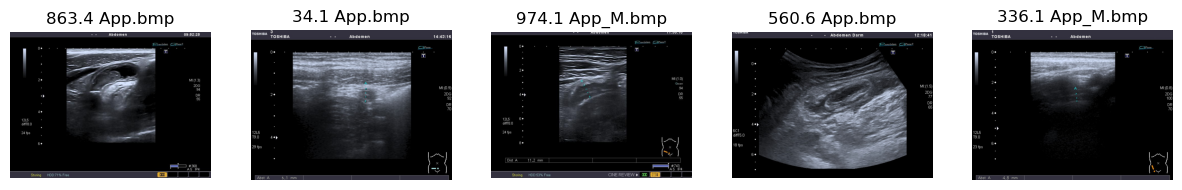

In [21]:
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing extracted images
extracted_dir = 'extracted_images2/US_Pictures'

# Get list of image files
image_files = list(Path(extracted_dir).glob("*.bmp"))[:5]  # Change extension if needed

# Show images
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))

for ax, img_path in zip(axes, image_files):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis("off")  # Hide axes
    ax.set_title(img_path.name)

plt.show()
plt.close()


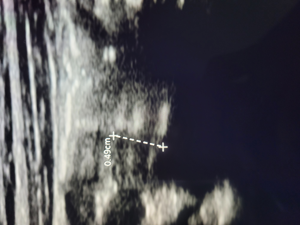

In [60]:
# 
img = Image.open(f'{extracted_dir}/962.4.jpg')
fixed_width = 300  # Adjust as needed
aspect_ratio = img.height / img.width  # Maintain aspect ratio
new_height = int(fixed_width * aspect_ratio)

# Resize image
img_resized = img.resize((fixed_width, new_height))
img_resized

two files need to be removed for further processing

In [64]:
%%bash

FIRST_RUN=true
image_dir="extracted_images2/US_Pictures"
ls "$image_dir" | grep -E "962.4.jpg$" || echo "No matching files found"
ls "$image_dir" | grep -E "962.3.jpg$" || echo "No matching files found"
rm "$image_dir"/962.4.jpg
rm "$image_dir"/962.3.jpg

ls "$image_dir" | grep -E "962.4.jpg$" || echo "No 3 file found"
ls "$image_dir" | grep -E "962.3.jpg$" || echo "No 4 file found"



No matching files found
962.3.jpg


rm: cannot remove 'extracted_images2/US_Pictures/962.4.jpg': No such file or directory


No 3 files found
No 4 files found


The images with multiple views in one are as follows: 
9.2 Appendix.bmp 9.2
12.2 Appendix.png 12.2
14.1 Appendix.png 14.1
14.3 Appendix.png 14.3
43.1 App L and T.png 43.1
64.2 FF retrovesical.bmp 64.2
465.6 App_M.bmp 465.6
465.7 App_M.bmp 465.7
465.8 App_M.bmp 465.8
520.3 App_M.bmp 520.3
530.2 App.bmp 530.2
537.6 App.bmp 537.6
545.2 App.bmp 545.2
587.3 App.bmp 587.3
747.6 App.bmp 747.6
833.2 App.bmp 833.2
833.3 App.bmp 833.3
833.4 App.bmp 833.4
833.5 App.bmp 833.5
Visualizing all
extracted_images2/US_Pictures/9.2 Appendix.bmp
extracted_images2/US_Pictures/12.2 Appendix.png
extracted_images2/US_Pictures/14.1 Appendix.png
extracted_images2/US_Pictures/14.3 Appendix.png
extracted_images2/US_Pictures/43.1 App L and T.png
extracted_images2/US_Pictures/64.2 FF retrovesical.bmp
extracted_images2/US_Pictures/465.6 App_M.bmp
extracted_images2/US_Pictures/465.7 App_M.bmp
extracted_images2/US_Pictures/465.8 App_M.bmp
extracted_images2/US_Pictures/520.3 App_M.bmp
extracted_images2/US_Pictures/530.

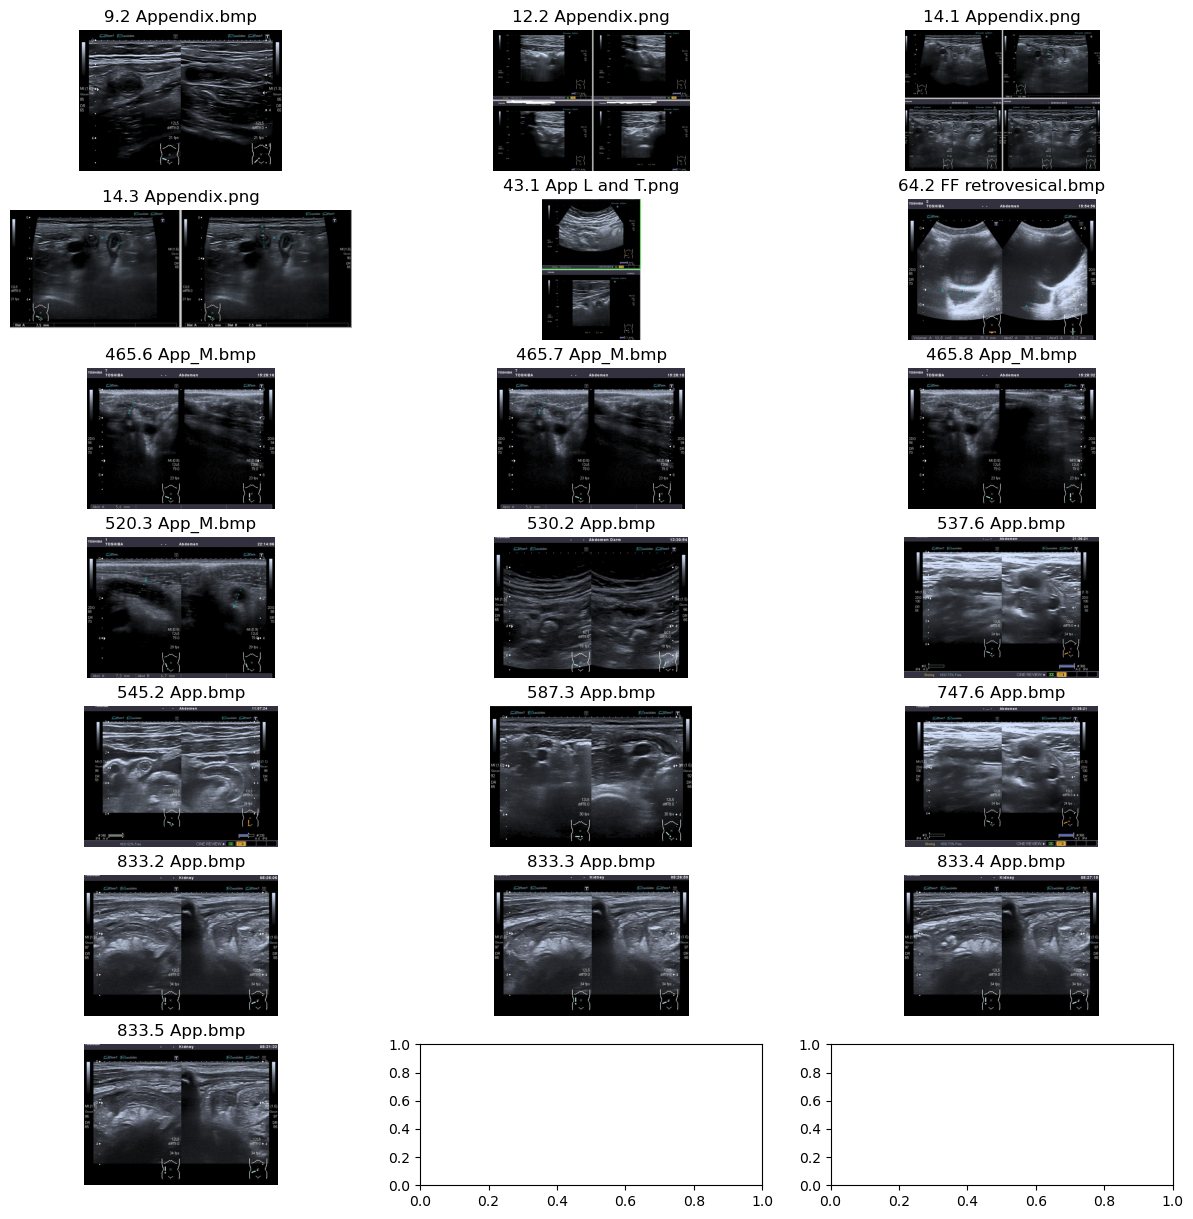

In [72]:
#visualize the image with multiple US clicks 

multiple_images_paths = []
with open('pediatric/multiple_in_one') as file:
    text = file.readlines()
    multiple_images_paths = [x.strip() for x in text]


multiple_image_subjects = [float(x.split(' ')[0]) for x in multiple_images_paths]
print("The images with multiple views in one are as follows: ")
for x,y in zip(multiple_images_paths, multiple_image_subjects):
    print(x,y)

print("Visualizing all")
fig, axes = plt.subplots( len(multiple_image_subjects) // 3 + 1, 3, figsize=(15, 15))

for ax, img_name in zip(axes.flatten(), multiple_images_paths):
    image_path = Path(extracted_dir) / img_name
    print(image_path)
    img = Image.open(image_path)
    ax.imshow(img)
    ax.axis("off")  # Hide axes
    ax.set_title(image_path.name)

In [90]:
multiple_images_paths

['9.2 Appendix.bmp',
 '12.2 Appendix.png',
 '14.1 Appendix.png',
 '14.3 Appendix.png',
 '43.1 App L and T.png',
 '64.2 FF retrovesical.bmp',
 '465.6 App_M.bmp',
 '465.7 App_M.bmp',
 '465.8 App_M.bmp',
 '520.3 App_M.bmp',
 '530.2 App.bmp',
 '537.6 App.bmp',
 '545.2 App.bmp',
 '587.3 App.bmp',
 '747.6 App.bmp',
 '833.2 App.bmp',
 '833.3 App.bmp',
 '833.4 App.bmp',
 '833.5 App.bmp']

In [91]:
from PIL import Image
from pathlib import Path

# Assuming extracted_dir and multiple_images_paths are defined
four_in_one = ['12.2 Appendix.png', '14.1 Appendix.png']
horizontal = ['43.1 App L and T.png']
vertical = list(set(multiple_images_paths) - set(four_in_one) - set(horizontal))

# Process four_in_one images (2x2 grid)
for img_name in four_in_one:
    image_path = Path(extracted_dir) / img_name
    img = Image.open(image_path)
    width, height = img.size
    
    mid_width = width // 2
    mid_height = height // 2
    
    quadrants = [
        ('a', (0, 0, mid_width, mid_height)),           # Top-left
        ('b', (mid_width, 0, width, mid_height)),      # Top-right
        ('c', (0, mid_height, mid_width, height)),     # Bottom-left
        ('d', (mid_width, mid_height, width, height))  # Bottom-right
    ]
    
    for suffix, box in quadrants:
        quadrant_img = img.crop(box)
        # Insert suffix before the last period
        new_name = img_name.rsplit('.', 1)[0] + suffix + '.' + img_name.rsplit('.', 1)[1]
        quadrant_img.save(Path(extracted_dir) / new_name)
        print(f"Saved {new_name}")

# Process horizontal images (top/bottom split)
for img_name in horizontal:
    image_path = Path(extracted_dir) / img_name
    img = Image.open(image_path)
    width, height = img.size
    mid_height = height // 2
    
    top_half = img.crop((0, 0, width, mid_height))
    top_name = img_name.rsplit('.', 1)[0] + 'a.' + img_name.rsplit('.', 1)[1]
    top_half.save(Path(extracted_dir) / top_name)
    
    bottom_half = img.crop((0, mid_height, width, height))
    bottom_name = img_name.rsplit('.', 1)[0] + 'b.' + img_name.rsplit('.', 1)[1]
    bottom_half.save(Path(extracted_dir) / bottom_name)
    
    print(f"Processed {img_name} into:")
    print(f"  {top_name}")
    print(f"  {bottom_name}")

# Process vertical images (left/right split)
for img_name in vertical:
    image_path = Path(extracted_dir) / img_name
    img = Image.open(image_path)
    width, height = img.size
    mid_width = width // 2
    
    left_half = img.crop((0, 0, mid_width, height))
    left_name = img_name.rsplit('.', 1)[0] + 'a.' + img_name.rsplit('.', 1)[1]
    left_half.save(Path(extracted_dir) / left_name)
    
    right_half = img.crop((mid_width, 0, width, height))
    right_name = img_name.rsplit('.', 1)[0] + 'b.' + img_name.rsplit('.', 1)[1]
    right_half.save(Path(extracted_dir) / right_name)
    
    print(f"Processed {img_name} into:")
    print(f"  {left_name} (left half)")
    print(f"  {right_name} (right half)")

Saved 12.2 Appendixa.png
Saved 12.2 Appendixb.png
Saved 12.2 Appendixc.png
Saved 12.2 Appendixd.png
Saved 14.1 Appendixa.png
Saved 14.1 Appendixb.png
Saved 14.1 Appendixc.png
Saved 14.1 Appendixd.png
Processed 43.1 App L and T.png into:
  43.1 App L and Ta.png
  43.1 App L and Tb.png
Processed 530.2 App.bmp into:
  530.2 Appa.bmp (left half)
  530.2 Appb.bmp (right half)
Processed 14.3 Appendix.png into:
  14.3 Appendixa.png (left half)
  14.3 Appendixb.png (right half)
Processed 747.6 App.bmp into:
  747.6 Appa.bmp (left half)
  747.6 Appb.bmp (right half)
Processed 465.6 App_M.bmp into:
  465.6 App_Ma.bmp (left half)
  465.6 App_Mb.bmp (right half)
Processed 833.5 App.bmp into:
  833.5 Appa.bmp (left half)
  833.5 Appb.bmp (right half)
Processed 64.2 FF retrovesical.bmp into:
  64.2 FF retrovesicala.bmp (left half)
  64.2 FF retrovesicalb.bmp (right half)
Processed 9.2 Appendix.bmp into:
  9.2 Appendixa.bmp (left half)
  9.2 Appendixb.bmp (right half)
Processed 537.6 App.bmp into:
  

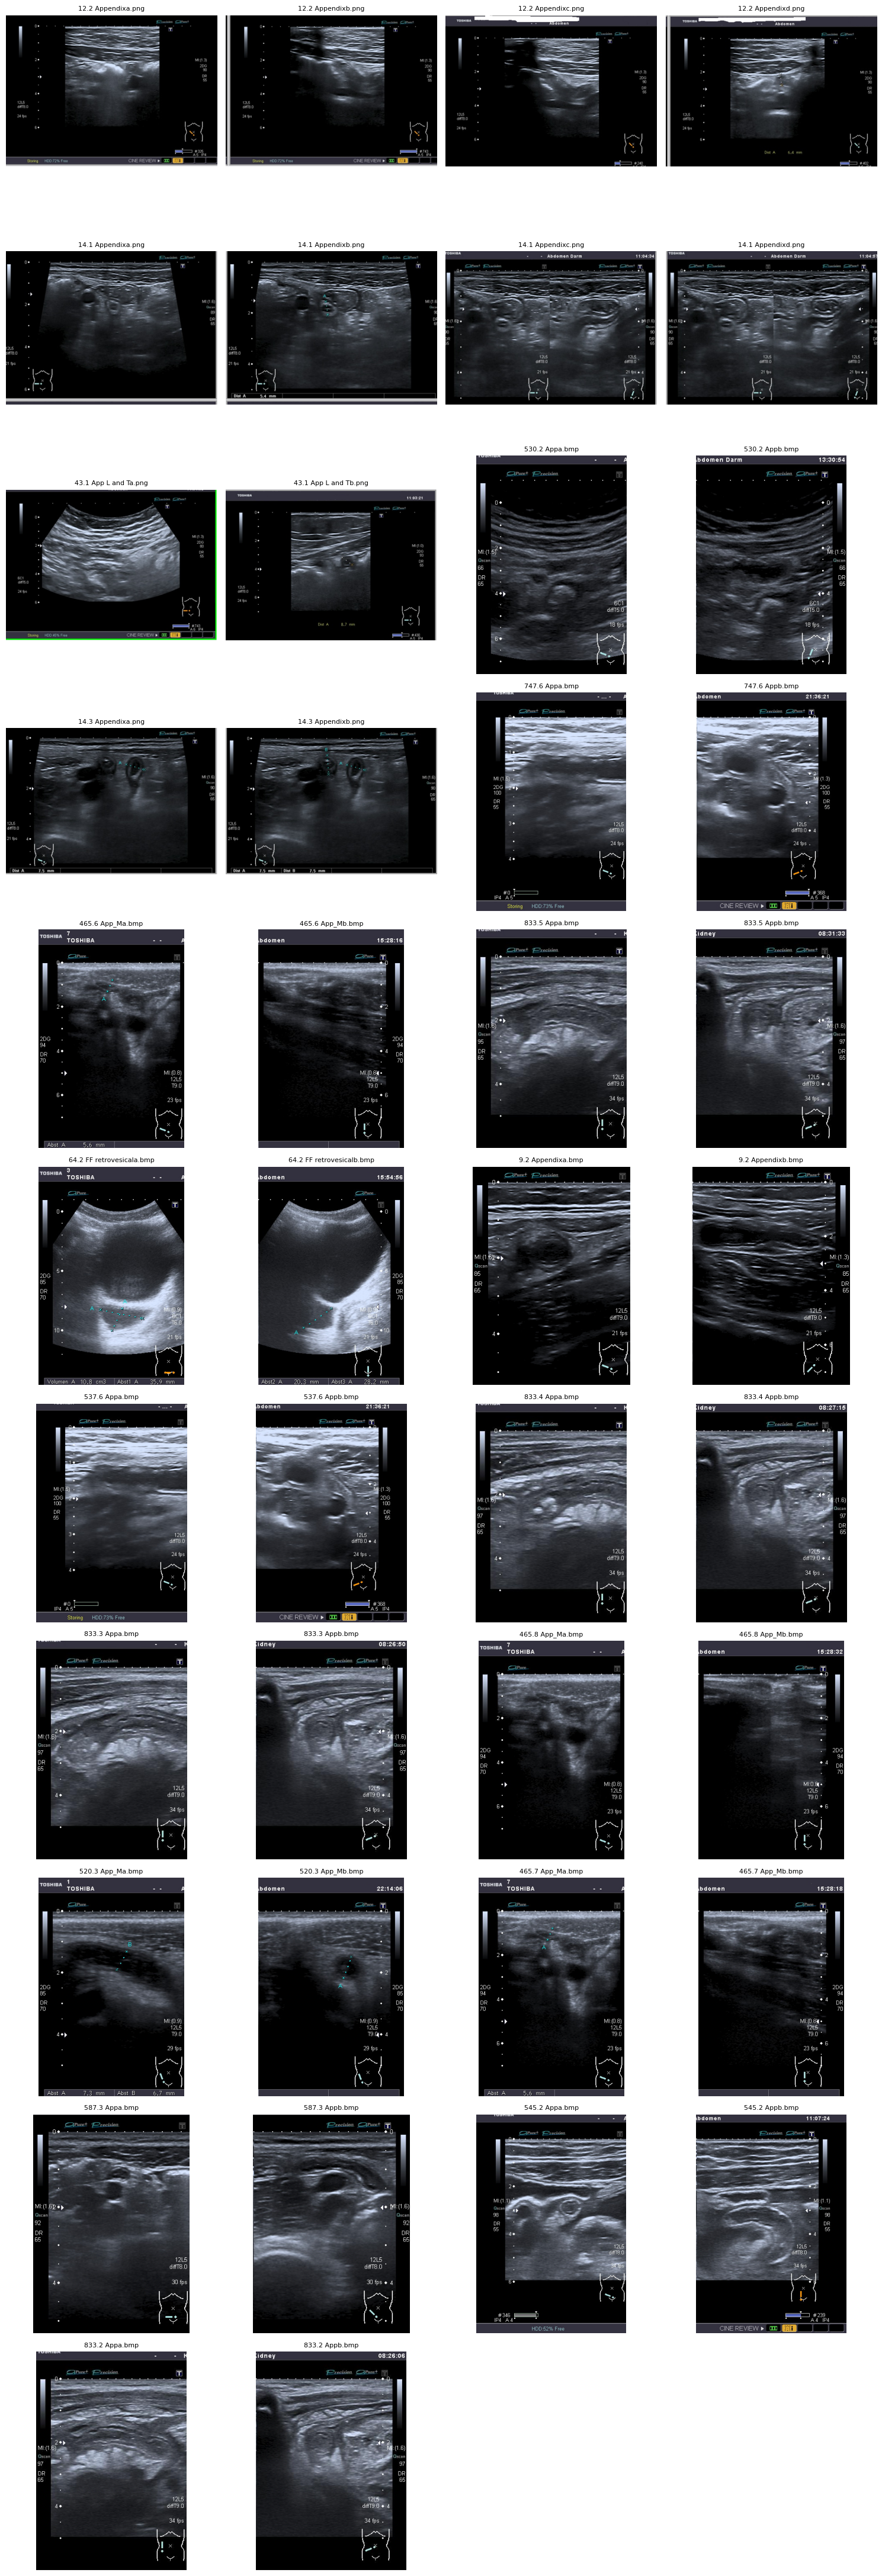

In [92]:
import matplotlib.pyplot as plt

# Generate list of all processed image paths
all_processed_images = []
for img_name in four_in_one:
    all_processed_images.extend([
        img_name.rsplit('.', 1)[0] + suffix + '.' + img_name.rsplit('.', 1)[1]
        for suffix in ['a', 'b', 'c', 'd']
    ])

for img_name in horizontal + vertical:
    all_processed_images.extend([
        img_name.rsplit('.', 1)[0] + suffix + '.' + img_name.rsplit('.', 1)[1]
        for suffix in ['a', 'b']
    ])

# Calculate grid size
n_images = len(all_processed_images)
cols = 4
rows = (n_images + cols - 1) // cols

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# Display images
for ax, img_name in zip(axes, all_processed_images):
    image_path = Path(extracted_dir) / img_name
    if image_path.exists():
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(img_name, fontsize=8)
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, f'Missing: {img_name}', 
                ha='center', va='center')
        ax.axis('off')

# Hide extra axes
for ax in axes[n_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [34]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

four_in_one = ['12.2 Appendix.png', '14.1 Appendix.png']
horizontal = ['43.1 App L and T.png']
vertical = list(set(multiple_images_paths) - set(four_in_one) - set(horizontal))

# Further split 14.1 Appendixc.png and 14.1 Appendixd.png vertically
images_to_further_split = [
    '14.1 Appendixc.png',
    '14.1 Appendixd.png'
]

for img_name in images_to_further_split:
    image_path = Path(extracted_dir) / img_name
    if image_path.exists():
        img = Image.open(image_path)
        width, height = img.size
        mid_width = width // 2
        
        # Left half
        left_half = img.crop((0, 0, mid_width, height))
        left_name = img_name.rsplit('.', 1)[0] + '_left.' + img_name.rsplit('.', 1)[1]
        left_half.save(Path(extracted_dir) / left_name)
        
        # Right half
        right_half = img.crop((mid_width, 0, width, height))
        right_name = img_name.rsplit('.', 1)[0] + '_right.' + img_name.rsplit('.', 1)[1]
        right_half.save(Path(extracted_dir) / right_name)
        
        print(f"Further split {img_name} into:")
        print(f"  {left_name}")
        print(f"  {right_name}")

# Generate list of all processed image paths for visualization
all_processed_images = []
for img_name in four_in_one:
    all_processed_images.extend([
        img_name.rsplit('.', 1)[0] + suffix + '.' + img_name.rsplit('.', 1)[1]
        for suffix in ['a', 'b', 'c', 'd']
    ])

for img_name in horizontal + vertical:
    all_processed_images.extend([
        img_name.rsplit('.', 1)[0] + suffix + '.' + img_name.rsplit('.', 1)[1]
        for suffix in ['a', 'b']
    ])

# Add the further split images
all_processed_images.extend([
    '14.1 Appendixc_left.png',
    '14.1 Appendixc_right.png',
    '14.1 Appendixd_left.png',
    '14.1 Appendixd_right.png'
])

# Remove the original c and d since they're now further split
all_processed_images = [img for img in all_processed_images 
                       if img not in ['14.1 Appendixc.png', '14.1 Appendixd.png']]

# Calculate grid size
n_images = len(all_processed_images)
cols = 4

rows = (n_images + cols - 1) // cols

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# Display images
for ax, img_name in zip(axes, all_processed_images):
    image_path = Path(extracted_dir) / img_name
    if image_path.exists():
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(img_name, fontsize=8)
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, f'Missing: {img_name}', 
                ha='center', va='center')
        ax.axis('off')

# Hide extra axes
for ax in axes[n_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'multiple_images_paths' is not defined

In [120]:
from pathlib import Path

vertical = list(set(multiple_images_paths) - set(four_in_one) - set(horizontal))
parent_images = four_in_one + horizontal + vertical + images_to_further_split

# Create a space-separated string of quoted file paths for bash
parent_images_str = ' '.join([f'"{extracted_dir}/{img}"' for img in parent_images])

# Print this so you can use it in the bash cell
print(parent_images_str)

"extracted_images2/US_Pictures/12.2 Appendix.png" "extracted_images2/US_Pictures/14.1 Appendix.png" "extracted_images2/US_Pictures/43.1 App L and T.png" "extracted_images2/US_Pictures/530.2 App.bmp" "extracted_images2/US_Pictures/14.3 Appendix.png" "extracted_images2/US_Pictures/747.6 App.bmp" "extracted_images2/US_Pictures/465.6 App_M.bmp" "extracted_images2/US_Pictures/833.5 App.bmp" "extracted_images2/US_Pictures/64.2 FF retrovesical.bmp" "extracted_images2/US_Pictures/9.2 Appendix.bmp" "extracted_images2/US_Pictures/537.6 App.bmp" "extracted_images2/US_Pictures/833.4 App.bmp" "extracted_images2/US_Pictures/833.3 App.bmp" "extracted_images2/US_Pictures/465.8 App_M.bmp" "extracted_images2/US_Pictures/520.3 App_M.bmp" "extracted_images2/US_Pictures/465.7 App_M.bmp" "extracted_images2/US_Pictures/587.3 App.bmp" "extracted_images2/US_Pictures/545.2 App.bmp" "extracted_images2/US_Pictures/833.2 App.bmp" "extracted_images2/US_Pictures/14.1 Appendixc.png" "extracted_images2/US_Pictures/14.

In [122]:
%%bash
parent_images=("extracted_images2/US_Pictures/12.2 Appendix.png" "extracted_images2/US_Pictures/14.1 Appendix.png" "extracted_images2/US_Pictures/43.1 App L and T.png" "extracted_images2/US_Pictures/530.2 App.bmp" "extracted_images2/US_Pictures/14.3 Appendix.png" "extracted_images2/US_Pictures/747.6 App.bmp" "extracted_images2/US_Pictures/465.6 App_M.bmp" "extracted_images2/US_Pictures/833.5 App.bmp" "extracted_images2/US_Pictures/64.2 FF retrovesical.bmp" "extracted_images2/US_Pictures/9.2 Appendix.bmp" "extracted_images2/US_Pictures/537.6 App.bmp" "extracted_images2/US_Pictures/833.4 App.bmp" "extracted_images2/US_Pictures/833.3 App.bmp" "extracted_images2/US_Pictures/465.8 App_M.bmp" "extracted_images2/US_Pictures/520.3 App_M.bmp" "extracted_images2/US_Pictures/465.7 App_M.bmp" "extracted_images2/US_Pictures/587.3 App.bmp" "extracted_images2/US_Pictures/545.2 App.bmp" "extracted_images2/US_Pictures/833.2 App.bmp" "extracted_images2/US_Pictures/14.1 Appendixc.png" "extracted_images2/US_Pictures/14.1 Appendixd.png")
for file in "${parent_images[@]}"; do
    if [ -f "$file" ]; then
        ls "$file"
#echo "Removed: $file"
    else
        echo "File not found: $file"
    fi
done

extracted_images2/US_Pictures/12.2 Appendix.png
extracted_images2/US_Pictures/14.1 Appendix.png
extracted_images2/US_Pictures/43.1 App L and T.png
extracted_images2/US_Pictures/530.2 App.bmp
extracted_images2/US_Pictures/14.3 Appendix.png
extracted_images2/US_Pictures/747.6 App.bmp
extracted_images2/US_Pictures/465.6 App_M.bmp
extracted_images2/US_Pictures/833.5 App.bmp
extracted_images2/US_Pictures/64.2 FF retrovesical.bmp
extracted_images2/US_Pictures/9.2 Appendix.bmp
extracted_images2/US_Pictures/537.6 App.bmp
extracted_images2/US_Pictures/833.4 App.bmp
extracted_images2/US_Pictures/833.3 App.bmp
extracted_images2/US_Pictures/465.8 App_M.bmp
extracted_images2/US_Pictures/520.3 App_M.bmp
extracted_images2/US_Pictures/465.7 App_M.bmp
extracted_images2/US_Pictures/587.3 App.bmp
extracted_images2/US_Pictures/545.2 App.bmp
extracted_images2/US_Pictures/833.2 App.bmp
extracted_images2/US_Pictures/14.1 Appendixc.png
extracted_images2/US_Pictures/14.1 Appendixd.png


In [ ]:
%%bash
parent_images=("extracted_images2/US_Pictures/12.2 Appendix.png" "extracted_images2/US_Pictures/14.1 Appendix.png" "extracted_images2/US_Pictures/43.1 App L and T.png" "extracted_images2/US_Pictures/530.2 App.bmp" "extracted_images2/US_Pictures/14.3 Appendix.png" "extracted_images2/US_Pictures/747.6 App.bmp" "extracted_images2/US_Pictures/465.6 App_M.bmp" "extracted_images2/US_Pictures/833.5 App.bmp" "extracted_images2/US_Pictures/64.2 FF retrovesical.bmp" "extracted_images2/US_Pictures/9.2 Appendix.bmp" "extracted_images2/US_Pictures/537.6 App.bmp" "extracted_images2/US_Pictures/833.4 App.bmp" "extracted_images2/US_Pictures/833.3 App.bmp" "extracted_images2/US_Pictures/465.8 App_M.bmp" "extracted_images2/US_Pictures/520.3 App_M.bmp" "extracted_images2/US_Pictures/465.7 App_M.bmp" "extracted_images2/US_Pictures/587.3 App.bmp" "extracted_images2/US_Pictures/545.2 App.bmp" "extracted_images2/US_Pictures/833.2 App.bmp" "extracted_images2/US_Pictures/14.1 Appendixc.png" "extracted_images2/US_Pictures/14.1 Appendixd.png")
for file in "${parent_images[@]}"; do
    if [ -f "$file" ]; then
        rm "$file"
        echo "Removed: $file"
    else
        echo "File not found: $file"
    fi
done

Removed: extracted_images2/US_Pictures/12.2 Appendix.png
Removed: extracted_images2/US_Pictures/14.1 Appendix.png
Removed: extracted_images2/US_Pictures/43.1 App L and T.png
Removed: extracted_images2/US_Pictures/530.2 App.bmp
Removed: extracted_images2/US_Pictures/14.3 Appendix.png
Removed: extracted_images2/US_Pictures/747.6 App.bmp
Removed: extracted_images2/US_Pictures/465.6 App_M.bmp
Removed: extracted_images2/US_Pictures/833.5 App.bmp
Removed: extracted_images2/US_Pictures/64.2 FF retrovesical.bmp
Removed: extracted_images2/US_Pictures/9.2 Appendix.bmp
Removed: extracted_images2/US_Pictures/537.6 App.bmp
Removed: extracted_images2/US_Pictures/833.4 App.bmp
Removed: extracted_images2/US_Pictures/833.3 App.bmp
Removed: extracted_images2/US_Pictures/465.8 App_M.bmp
Removed: extracted_images2/US_Pictures/520.3 App_M.bmp
Removed: extracted_images2/US_Pictures/465.7 App_M.bmp
Removed: extracted_images2/US_Pictures/587.3 App.bmp
Removed: extracted_images2/US_Pictures/545.2 App.bmp
Remov

In [124]:
! ls {extracted_dir} | wc -l

2140


In [164]:
! ls pediatric/preprocessed/constant_padding/deepfilled_cropped_train/

100.1_App_M.png
100.2_RLQ.png
100.3_RLQ.png
101.10_App_M.png
101.11_App_M.png
101.12_App.png
101.13_App_M.png
101.14_App.png
101.15_App.png
101.1_App_M.png
101.2_App_D.png
101.3_App_M.png
101.4_App_M.png
101.5_App_M.png
101.6_App_M.png
101.7_App_M.png
101.8_App.png
101.9_App_M.png
10.1_Appendix_and_surrounding_free_fluis.png
102.10_App.png
102.11.png
102.12_App.png
102.13_App_M.png
102.14_App.png
102.15_App_M.png
102.16_App_M.png
102.17_App_M.png
102.18_App.png
102.19_App.png
102.1_App.png
102.2_App.png
102.3_App.png
102.4_App.png
102.5_App_M.png
102.6_App.png
102.7_App.png
102.8_App.png
102.9_App.png
10.2_Appendix_and_surrounding_free_fluis.png
103.1_App_M.png
103.2_App_M.png
103.3_App.png
103.4_App_M.png
103.5_App.png
103.6_App_M.png
103.7_App_M.png
103.8_App.png
103.9_App_M.png
104.1_RLQ_M.png
105.10_App.png
105.11_App_M.png
105.12_App.png
105.13_RLQ.png
105.1_App.png
105.2_App_M.png
105.3_App_M.png
105.4_App_M.png
105.5_App_M.png
105.6_App.png
105.7_App_M.png
105.8_App_M.png
105.9_

In [41]:
deepfill_preprocessed_all = '/home/jovyan/pediatric/preprocessed/constant_padding/deepfilled_cropped_all'
!ls {deepfill_preprocessed_all}

100.1_App_M.png
100.2_RLQ.png
100.3_RLQ.png
101.10_App_M.png
101.11_App_M.png
101.12_App.png
101.13_App_M.png
101.14_App.png
101.15_App.png
101.1_App_M.png
101.2_App_D.png
101.3_App_M.png
101.4_App_M.png
101.5_App_M.png
101.6_App_M.png
101.7_App_M.png
101.8_App.png
101.9_App_M.png
10.1_Appendix_and_surrounding_free_fluis.png
102.10_App.png
102.11.png
102.12_App.png
102.13_App_M.png
102.14_App.png
102.15_App_M.png
102.16_App_M.png
102.17_App_M.png
102.18_App.png
102.19_App.png
102.1_App.png
102.2_App.png
102.3_App.png
102.4_App.png
102.5_App_M.png
102.6_App.png
102.7_App.png
102.8_App.png
102.9_App.png
10.2_Appendix_and_surrounding_free_fluis.png
103.1_App_M.png
103.2_App_M.png
103.3_App.png
103.4_App_M.png
103.5_App.png
103.6_App_M.png
103.7_App_M.png
103.8_App.png
103.9_App_M.png
104.1_RLQ_M.png
105.10_App.png
105.11_App_M.png
105.12_App.png
105.13_RLQ.png
105.1_App.png
105.2_App_M.png
105.3_App_M.png
105.4_App_M.png
105.5_App_M.png
105.6_App.png
105.7_App_M.png
105.8_App_M.png
105.9_

ls: cannot access '{extracted_dir}': No such file or directory


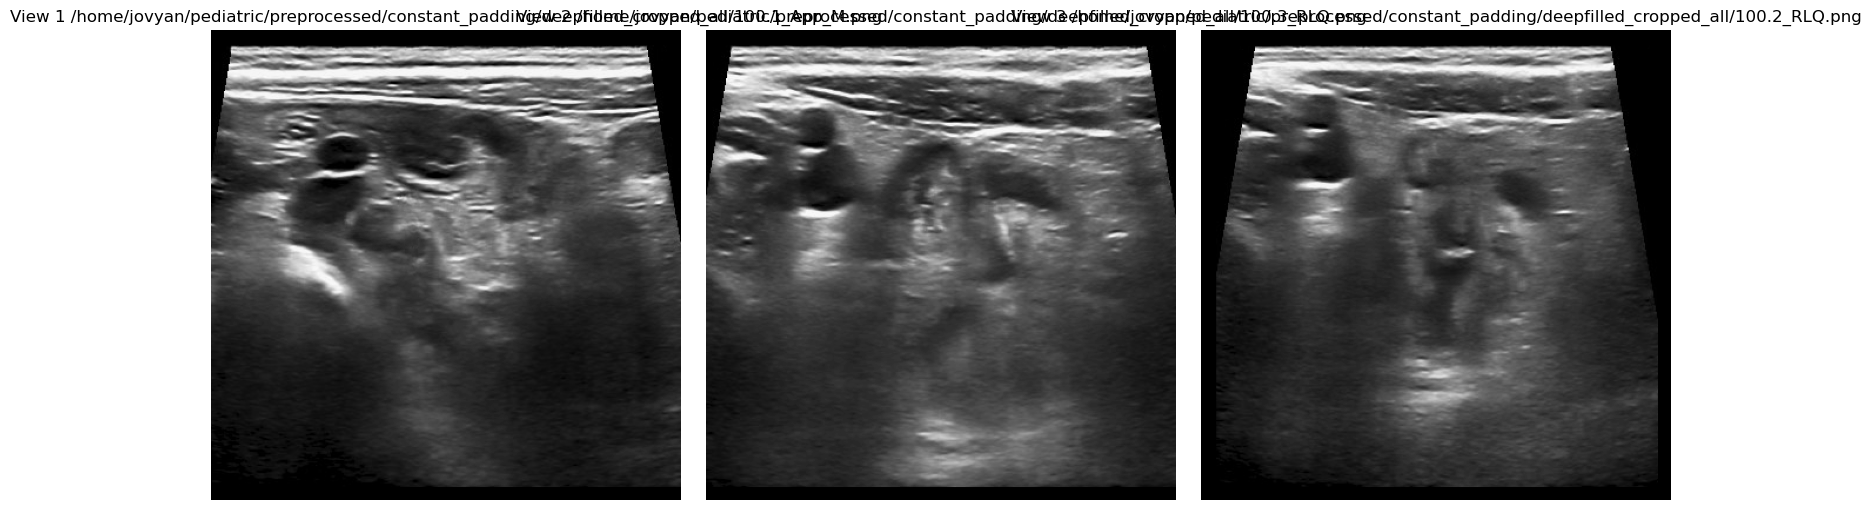

In [78]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image


def visualize_subject_images(subject_number, extract_dir=deepfill_preprocessed_all):
    # Step 1: Extract the zip file (if not already extracted)

    
    if not os.path.exists(extract_dir):
        raise Error('Directory cannot found')
    
    # Step 2: List all files in the extracted directory
    image_dir = extract_dir
    if not os.path.exists(image_dir):
        raise FileNotFoundError(f"Directory {image_dir} does not exist.")
    
    # Filter images by subject number
    subject_images = [f for f in os.listdir(image_dir) if f.startswith(f"{subject_number}.")]
    
    if not subject_images:
        print(f"No images found for subject {subject_number}.")
        return
    
    # Step 3: Visualize the images
    num_images = len(subject_images)
    cols = 3
    rows = num_images // cols + 1*(num_images%cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    
    if num_images == 1:
        axes = [axes]  # Ensure axes is iterable for single image case
    else:
        axes = axes.flatten()
    for i, img_file in enumerate(subject_images):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"View {i+1} {img_path}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
subject_no = 100  # Replace with the desired subject number
! ls {extracted_dir} | grep {subject_no}
visualize_subject_images(subject_no)



Manual Filters : some images has color inpainting, which complicated preprocessing, they are removed by manual inspection.

In [79]:
images_to_remove = ["84.3", "87.4"]
for img_path in Path(extracted_dir).iterdir():
    prefix = img_path.stem.__str__().split('/')[-1].split(' ')[0]
    if prefix in images_to_remove:
        img_path.unlink()
! ls {extracted_dir} | grep 84.1

NameError: name 'extracted_dir' is not defined

In [80]:
import os
import zipfile
from PIL import Image



def analyze_subject_images(image_dir):
    if not os.path.exists(image_dir):
        raise FileNotFoundError(f"Directory {image_dir} does not exist.")
    
    # Dictionary to store results
    subject_data = {}

    # Process all BMP, PNG, JPG files in the directory
    for img_file in os.listdir(image_dir):
        if img_file.endswith('.bmp') or img_file.endswith('.png') or img_file.endswith('.jpg'):
            # Parse the subject number and view number from the filename
            parts = img_file.split('.')
            if len(parts) < 3:
                print(f"Skipping invalid filename: {img_file}")
                continue
            
            subject_no = parts[0]
            view_no = parts[1]
            extra_info = '.'.join(parts[2:])  # Part of the name after the view number
            
            # Load the image to get its dimensions
            img_path = os.path.join(image_dir, img_file)
            try:
                img = Image.open(img_path)
                
                width, height = img.size
                img.close()

            except Exception as e:
                print(f"Error loading image {img_file}: {e}")
                continue
            
            # Update the subject data dictionary
            if subject_no not in subject_data:
                subject_data[subject_no] = {
                    'num_views': 0,
                    'views': []
                }
            
            subject_data[subject_no]['num_views'] += 1
            subject_data[subject_no]['views'].append({
                'view_no': view_no,
                'dimensions': (width, height),
                'extra_info': extra_info
            })
        else:
            print(f' file type of {img_file} is also found')
                
    return subject_data

# Example usage
subject_data = analyze_subject_images(image_dir=deepfill_preprocessed_all)


 file type of .ipynb_checkpoints is also found


In [81]:
for key, value in subject_data.items():
    if key and not value:
        print(f'This {key} doesn\'t have value')

In [39]:
for x,y in zip(sorted(list(subject_data.keys())), sorted(us_numbers)):
    print(x, y)

1 60.0
10 61.0
100 62.0
101 63.0
102 64.0
103 65.0
104 67.0
105 68.0
106 69.0
107 70.0
108 71.0
109 72.0
11 73.0
111 74.0
112 75.0
114 77.0
115 78.0
116 79.0
117 80.0
118 317.0
119 318.0
12 319.0
120 320.0
121 321.0
122 322.0
123 323.0
124 324.0
125 326.0
126 327.0
128 328.0
129 329.0
13 330.0
130 332.0
132 333.0
133 336.0
137 337.0
138 344.0
14 431.0
143 nan
145 331.0
15 339.0
151 340.0
152 341.0
153 342.0
154 343.0
156 345.0
157 432.0
158 575.0
159 578.0
16 579.0
160 583.0
161 584.0
162 585.0
164 586.0
168 587.0
169 589.0
17 591.0
170 592.0
171 593.0
173 595.0
174 596.0
175 597.0
176 598.0
177 600.0
178 601.0
179 602.0
18 603.0
180 604.0
181 606.0
182 607.0
184 609.0
185 612.0
186 613.0
187 614.0
188 615.0
189 616.0
19 617.0
190 619.0
191 620.0
192 621.0
195 622.0
196 623.0
197 624.0
198 625.0
199 626.0
20 628.0
200 nan
201 633.0
202 635.0
203 636.0
204 638.0
205 641.0
207 642.0
208 643.0
209 644.0
21 645.0
210 646.0
211 647.0
212 648.0
213 652.0
215 653.0
216 656.0
22 657.0
220 660.

In [40]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Image preprocessing

Skip this if already preprocessed image is used

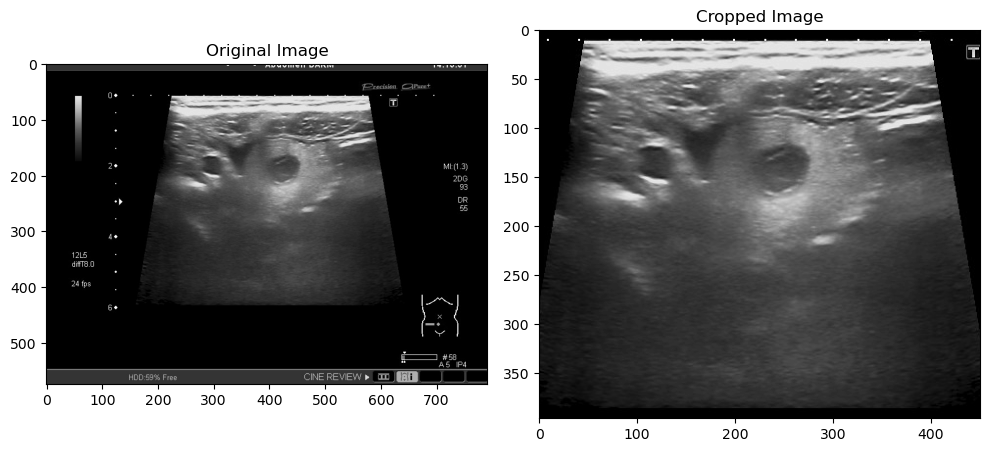

padded:  {'top': 47, 'bottom': 444, 'left': 179, 'right': 630, 'image': array([[51, 51, 51, ..., 51, 51, 51],
       [51, 51, 51, ..., 51, 51, 51],
       [51, 51, 51, ..., 51, 51, 51],
       ...,
       [52, 52, 52, ..., 53, 46, 54],
       [52, 52, 52, ..., 53, 60, 42],
       [52, 52, 52, ..., 51, 49, 58]], dtype=uint8)} [[0 0 0 ... 4 2 4]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 3 2 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


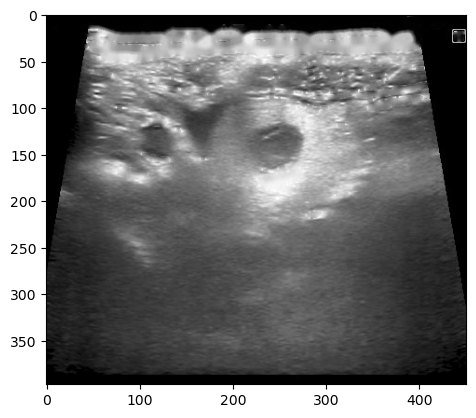

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def find_boundary_from_center(image_line, start_idx, direction='up', black_threshold=3, consecutive_req=20):
    consecutive_count = 0
    last_boundary = start_idx
    
    if direction == 'up':
        range_vals = range(start_idx, -1, -1)
    else:  # down
        range_vals = range(start_idx, len(image_line))
        
    for i in range_vals:
        if image_line[i] < black_threshold:
            consecutive_count += 1
            if consecutive_count >= consecutive_req:
                return last_boundary
        else:
            consecutive_count = 0
            last_boundary = i
            
    return last_boundary

def detect_boundaries(gray_image, black_threshold=1, consecutive_req=20, debug=False):
   
    image = gray_image
    if image is None:
        raise ValueError(f"Could not read image at {image_path}")
    
    # Get image dimensions
    height, width = image.shape
    
    # Define center point
    center_x, center_y = width // 2, height // 2
    
    # Find vertical boundaries using center column
    center_column = image[:, center_x]
    i_top = find_boundary_from_center(center_column, center_y, 'up', black_threshold, consecutive_req)
    i_bottom = find_boundary_from_center(center_column, center_y, 'down', black_threshold, consecutive_req)
    
    # Find horizontal boundaries using center row
    center_row = image[center_y, :]
    j_left = find_boundary_from_center(center_row, center_x, 'up', black_threshold, consecutive_req)
    j_right = find_boundary_from_center(center_row, center_x, 'down', black_threshold, consecutive_req)
    
    # Refine boundaries by checking multiple columns/rows near the center
    sample_range = width // 10  # Check 10% of width around center
    
    # Refine vertical boundaries
    top_candidates = []
    bottom_candidates = []
    for x in range(center_x - sample_range, center_x + sample_range, 10):
        if x >= 0 and x < width:
            column = image[:, x]
            top_candidates.append(find_boundary_from_center(column, center_y, 'up', black_threshold, consecutive_req))
            bottom_candidates.append(find_boundary_from_center(column, center_y, 'down', black_threshold, consecutive_req))
    
    # Use median values to avoid outliers
    i_top = int(np.median(top_candidates))
    i_bottom = int(np.median(bottom_candidates))
    
    
    
    # Refine horizontal boundaries
    left_candidates = []
    right_candidates = []
    for y in range(center_y - sample_range, center_y + sample_range, 10):
        if y >= 0 and y < height:
            row = image[y, :]
            left_candidates.append(find_boundary_from_center(row, center_x, 'up', black_threshold, consecutive_req))
            right_candidates.append(find_boundary_from_center(row, center_x, 'down', black_threshold, consecutive_req))
    
    j_left = int(np.median(left_candidates))
    j_right = int(np.median(right_candidates))
    
    
    # Draw boundaries for visualization
    img_with_boundaries = image.copy()
    cv2.rectangle(img_with_boundaries, (j_left, i_top), (j_right, i_bottom), (255), 2)
    
    if debug:
        plt.figure(figsize=(15, 5))
        
        # Original image with center lines
        plt.subplot(1, 3, 1)
        plt.title('Original with Center Lines')
        plt.imshow(image, cmap='gray')
        plt.axvline(x=center_x, color='r', linestyle='--', alpha=0.5)
        plt.axhline(y=center_y, color='r', linestyle='--', alpha=0.5)
        plt.axis('on')
        plt.close()


        plt.subplot(1, 3, 2)
        plt.title('Intensity Profiles at Center')
        plt.figure(figsize=(6, 6))  # Square figure

        # Get maximum length for x-axis
        max_length = max(len(center_row), len(center_column))
        x_padding = int(max_length * 0.1)  # Add 10% padding to x-axis
        plt.xlim(0, max_length + x_padding)

        # Plot the horizontal profile with a pleasing light blue color and transparency
        x_h = np.arange(len(center_row))
        plt.plot(x_h, center_row, color='#3498db', alpha=0.8, linewidth=2, label='Horizontal Profile')

        # Plot the vertical profile with a pleasing light green color and transparency
        x_v = np.arange(len(center_column))
        plt.plot(x_v, center_column, color='#2ecc71', alpha=0.8, linewidth=2, label='Vertical Profile')

        # Add threshold line and legend before saving
        plt.axhline(y=black_threshold, color='#e74c3c', linestyle='--', alpha=0.7, label='Threshold')
        plt.legend()

        # Improve grid appearance
        plt.grid(True, linestyle='--', alpha=0.3)

        # Save the figure after all elements are added
        plt.tight_layout()
        plt.savefig('forslides/intensity_profile.png', dpi=300)
        plt.show()
        plt.close()
        
    
        
     
        # Final result
        plt.subplot(1, 3, 3)
        plt.title('Detected Boundaries')
        plt.imshow(img_with_boundaries, cmap='gray')
        plt.axis('on')
        
        plt.tight_layout()
        plt.show()
    
    return {
        'top': i_top,
        'bottom': i_bottom,
        'left': j_left,
        'right': j_right,
        'image': img_with_boundaries
    }

def process_single_image2(image_path, save_path=None, debug=False):
    """
    Process a single ultrasound image with optional debug visualization
    Args:
        image_path: Path to the image file
        save_path: Path to save the processed image (optional)
        debug: If True, display processing steps visualization
    """
    # Configs 
    target_dims = (400, 400)


    forslides_dir = Path("forslides")
    forslides_dir.mkdir(exist_ok=True)
    
    # Read and convert image
    img = cv2.imread(str(image_path))
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find boundaries    
    image_params = detect_boundaries(img_gray, debug=debug)
    
    # Destructure
    (_, i_top), (_, i_bottom), (_, j_left), (_, j_right), (_, img_with_boundaries) = image_params.items()
    
    # Crop image

    cropped = img_gray[i_top:i_bottom, j_left:j_right]

  

  
    
    padded = cropped

    if debug or True:  # Force debug for this troubleshooting
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title("Original Image")
            plt.imshow(img_gray, cmap='gray')
            plt.subplot(1, 2, 2)
            plt.title("Cropped Image")
            plt.imshow(padded, cmap='gray')
            plt.tight_layout()
            plt.savefig(forslides_dir / "debug_before_threshold.png")
            plt.show()

    
    # Create mask for very bright pixels (potential artifacts)
    print("padded: ",image_params,  padded)
    _, bright_mask = cv2.threshold(padded, 180, 255, cv2.THRESH_BINARY)

    # Check if the bright_mask is empty
    if bright_mask is None or bright_mask.size == 0:
        raise ValueError("The bright_mask is empty. Ensure the image is read correctly.")

    # Dilate the mask slightly to ensure better blending
    kernel = np.ones((3, 3), np.uint8)

    dilated_mask = cv2.dilate(bright_mask, kernel, iterations=1)

    final_image = cv2.inpaint(padded, dilated_mask, inpaintRadius=5, flags=cv2.INPAINT_TELEA)
    
    # Debug visualization and saving images
    if debug:
        forslides_dir = Path("forslides")
        forslides_dir.mkdir(exist_ok=True)
        
        # Original Image
        plt.figure(figsize=(5, 5))
        plt.imshow(img_gray, cmap='gray')
        plt.axis('off')  # Remove axis
        plt.savefig(forslides_dir / "a_original.png", bbox_inches='tight', pad_inches=0)
        plt.close()
        
        # Image with detected boundaries
        img_with_boundaries = img_gray.copy()
        cv2.rectangle(img_with_boundaries, (j_left, i_top), (j_right, i_bottom), (255), 2)
        plt.figure(figsize=(5, 5))
        plt.imshow(img_with_boundaries, cmap='gray')
        plt.axis('off')  # Remove axis
       # plt.savefig(forslides_dir / "b_boundaries.png", bbox_inches='tight', pad_inches=0)
        cv2.imwrite(forslides_dir / "b_boundaries.png", img_with_boundaries)
        plt.close()
        
        # Cropped Image
        plt.figure(figsize=(5, 5))
        plt.imshow(cropped, cmap='gray')
        plt.axis('off')  # Remove axis
        # plt.savefig(forslides_dir / "c_cropped.png", bbox_inches='tight', pad_inches=0)
        cv2.imwrite(forslides_dir / "c_cropped.png", cropped)
        plt.close()
        
        
        # Mask Image
        plt.figure(figsize=(5, 5))
        plt.imshow(dilated_mask, cmap='gray')
        plt.axis('off')  # Remove axis
        # plt.savefig(forslides_dir / "e_mask.png", bbox_inches='tight', pad_inches=0)
        cv2.imwrite(forslides_dir / "e_mask.png", dilated_mask)
        plt.close()
        
        # Final Image
        plt.figure(figsize=(5, 5))
        plt.imshow(final_image, cmap='gray')
        plt.axis('off')  # Remove axis
        # plt.savefig(forslides_dir / "f_final.png", bbox_inches='tight', pad_inches=0)
        cv2.imwrite(forslides_dir / "f_final.png", final_image)
        plt.close()
    
    return final_image




def process_images(images_directory, out_dir=None):


    if not images_directory:
        raise FileNotFoundError('Directory not found')

    images_directory = Path(images_directory)
    
    # Set output directory
    output_dir = Path(out_dir) if out_dir else images_directory

    # Ensure output directory exists

    output_dir.mkdir(parents=True, exist_ok=True)

    print('I am here')

    for file in images_directory.iterdir():
        if file.is_file() and file.suffix.lower() in {'.png', '.bmp'}:
            print(f'Preprocessing file {file}')
            image = process_single_image2(str(file), debug=False)
            output_path = output_dir / f"{file.stem}_preprocessed.png"
            cv2.imwrite(str(output_path), image)


def get_random_file(directory):
    directory = Path(directory)
    files = [file for file in directory.iterdir() if file.is_file()]
    
    return random.choice(files) if files else None


import random
img_path = get_random_file('extracted_images/US_Pictures')
#view image quick
def new_func(img_path):
    img = cv2.imread(str(img_path))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

## issue with this 'extracted_images/US_Pictures/103.2 App_M.bmp'
final_image = process_single_image2(img_path, debug=False)
plt.imshow(final_image, cmap='gray')
# Process directory
# process_images('extracted_images/US_Pictures')



In [1]:
print('hello')

hello


In [ ]:
X_train.head()

Age        BMI     Sex  Height  Weight  Alvarado_Score  \
197  16.580000  18.827111  female   158.0    47.0             4.0   
358  12.870637  15.147929  female   162.5    40.0             7.0   
270   9.681040  17.604773  female   143.0    36.0             4.0   
90    8.830000        NaN    male     NaN    33.8             8.0   
475   9.763176  14.184220    male   141.5    28.4             4.0   

     Paedriatic_Appendicitis_Score Migratory_Pain Lower_Right_Abd_Pain  \
197                            4.0             no                  yes   
358                            4.0             no                  yes   
270                            2.0             no                  yes   
90                             8.0            yes                  yes   
475                            4.0            yes                  yes   

    Contralateral_Rebound_Tenderness  ... Thrombocyte_Count Ketones_in_Urine  \
197                               no  ...             352.0               ++   
358                              yes  ...             259.0              NaN   
270                               no  ...             223.0              +++   
90                               yes  ...             267.0               no   
475                               no  ...             226.0               no   

    RBC_in_Urine  WBC_in_Urine   CRP  Dysuria     Stool Peritonitis  \
197          NaN            no  11.0       no    normal          no   
358          NaN           NaN  34.0       no  diarrhea          no   
270            +            ++  51.0       no    normal          no   
90            no            no   7.0       no    normal          no   
475           no            no   0.0       no    normal          no   

     Psoas_Sign  Ipsilateral_Rebound_Tenderness  
197          no                              no  
358          no                              no  
270          no                              no  
90           no                              no  
475         yes                              no  

[5 rows x 31 columns]

## Welcome to images

In [14]:
print(torch.__version__)
!pip install torch --upgrade
print(torch.__version__)

2.6.0+cu124
2.6.0+cu124


In [15]:
!pip install torchvision --upgrade

In [35]:

#utities for image
import torch
from torchvision.io import read_image, decode_image, ImageReadMode
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
import os


class CustomImageDataset(Dataset):
    
    def __init__(self, image_dir, tabular_dataframe):
        
        self.DEBUG = True
        
        if not os.path.exists(image_dir):
            raise FileNotFoundError(f"Directory {image_dir} does not exist.")

        # Dictionary to store results
        self.img_dir = image_dir
        subject_data = {}

        # Process all BMP, PNG, JPG files in the directory
        k = 0
        for img_file in os.listdir(image_dir):
            if img_file.endswith('.bmp') or img_file.endswith('.png') or img_file.endswith('.jpg'):
                # Parse the subject number and view number from the filename
                parts = img_file.split('_')
                k+=1
                [sub_no, view_no] = parts[0].split('.')[:2]
                sub_no = int(sub_no)
              
                if subject_data.get(sub_no, None) == None:
                    subject_data[sub_no] = [img_file]
                    continue
                subject_data[sub_no].append(img_file)

                
       
        self.img_labels = pd.DataFrame(list(subject_data.items()), columns=['US_Number', "images"])

        if self.DEBUG:
            print("len: ", len(list(subject_data.items())))
            image_subjects = set(self.img_labels['US_Number'])
            tabular_subjects = set(tabular_dataframe['US_Number'])
            print("\nAnalyzing data mismatches:")
            print(f"Subjects in tabular data: {len(tabular_subjects)}")
            print(f"Subjects with images: {len(image_subjects)}")
            print(f"Subjects in both: {len(image_subjects.intersection(tabular_subjects))}")

            print("\nMissing data analysis:")
            print(f"Subjects in tabular data but no images: {len(tabular_subjects - image_subjects)}")
            print("Sample of missing image subjects:", list(tabular_subjects - image_subjects))

            print(f"\nSubjects with images but no tabular data: {len(image_subjects - tabular_subjects)}")
            print("Sample of missing tabular subjects:", list(image_subjects - tabular_subjects))


       # print(self.img_labels.info())
        self.img_labels = tabular_dataframe[['Diagnosis', 'US_Number']].merge(right=self.img_labels, on='US_Number', how='inner' )

        if self.DEBUG:
            print("Data labels",self.img_labels.shape, self.img_labels.head())
        
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):

        images = self.img_labels.at[idx,'images']
        label = 1 if self.img_labels.at[idx, 'Diagnosis'] == 'appendicitis' else 0

        images = [decode_image(os.path.join(self.img_dir,img_path),mode='RGB') for img_path in images]

        images_tensor = torch.stack(images)

        assert 1 <= images_tensor.shape[0] <= 20 and images_tensor.shape[1:] == (3, 400, 400)

        if self.DEBUG:
            print("Image Tensor: ", images_tensor.shape, images_tensor)


        return images_tensor, label
        


dataset = CustomImageDataset('/home/jovyan/pediatric/preprocessed/constant_padding/deepfilled_cropped_all', df)
dataset[1]

len:  707

Analyzing data mismatches:
Subjects in tabular data: 759
Subjects with images: 707
Subjects in both: 578

Missing data analysis:
Subjects in tabular data but no images: 181
Sample of missing image subjects: [513.0, 2.0, 521.0, 527.0, 535.0, 536.0, 32.0, 36.0, 39.0, 40.0, 554.0, 561.0, 50.0, 568.0, 57.0, 58.0, 63.0, 71.0, 584.0, 596.0, 598.0, 600.0, 98.0, 612.0, 617.0, 110.0, 623.0, 113.0, 633.0, 638.0, 127.0, 641.0, 131.0, 644.0, 134.0, 135.0, 136.0, 646.0, 648.0, 139.0, 140.0, 141.0, 142.0, 144.0, 146.0, 147.0, 148.0, 149.0, 150.0, 664.0, 155.0, 667.0, 163.0, 165.0, 166.0, 167.0, 172.0, 689.0, 183.0, 696.0, 698.0, 704.0, 193.0, 194.0, 708.0, 714.0, 715.0, 717.0, 206.0, 718.0, 722.0, 725.0, 214.0, 217.0, 218.0, 219.0, 733.0, 737.0, 228.0, 229.0, 743.0, 234.0, 235.0, 236.0, 237.0, 241.0, 753.0, 245.0, 246.0, 247.0, 757.0, 760.0, 251.0, 765.0, 254.0, 257.0, 258.0, 772.0, 261.0, 262.0, 263.0, 265.0, 779.0, 780.0, 273.0, 787.0, 789.0, 281.0, 795.0, 292.0, 293.0, 301.0, 303.0, 30

(tensor([[[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
 
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
 
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]]], dtype=torch.uint8),
 0)

In [36]:
print(dataset.img_labels['Diagnosis'].value_counts())

Diagnosis
appendicitis       381
no appendicitis    196
Name: count, dtype: int64


In [38]:
print(len(dataset))
print(dataset[1])
        
def image_training_testing_data(df,X_train_imputed,X_test_imputed ):
    train_image_set = df.loc[X_train_imputed.index][['US_Number','Diagnosis']]
    test_image_set = df.loc[X_test_imputed.index][['US_Number', 'Diagnosis']]
    training_data = CustomImageDataset('preprocessed_images', train_image_set)
    testing_data = CustomImageDataset('preprocessed_images', test_image_set)
    print("Training size: ", len(training_data))
    print("Testing data size: ", len(testing_data))
    return training_data, testing_data

def load_data(directory):
    pass

training_data, testing_data = image_training_testing_data(df,X_train_imputed,X_test_imputed)

578
Image Tensor:  torch.Size([1, 3, 400, 400]) tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]], dtype=torch.uint8)
(tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],


In [39]:
for i in range(5):
    _, label = dataset[i]
    print(f"Sample {i}: Label {label}, Diagnosis {dataset.img_labels.at[i, 'Diagnosis']}")

Image Tensor:  torch.Size([3, 3, 400, 400]) tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  .

In [50]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=1, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=1, shuffle=True)


In [51]:
sample1feature, label1 = next(iter(train_dataloader))
print(sample1feature[0].size())
sample1feature.size(), label1

Image Tensor:  torch.Size([3, 3, 400, 400]) tensor([[[[135, 136, 132,  ...,  95,  92, 145],
          [141, 140, 132,  ...,  94,  94,  95],
          [133, 142, 134,  ...,  87,  82,  80],
          ...,
          [  6,  10,  13,  ...,  24,  20,  20],
          [  6,  10,  13,  ...,  34,  26,  20],
          [  3,   7,   9,  ...,  38,  30,  24]],

         [[135, 136, 132,  ...,  95,  92, 145],
          [141, 140, 132,  ...,  94,  94,  95],
          [133, 142, 134,  ...,  87,  82,  80],
          ...,
          [  6,  10,  13,  ...,  24,  20,  20],
          [  6,  10,  13,  ...,  34,  26,  20],
          [  3,   7,   9,  ...,  38,  30,  24]],

         [[135, 136, 132,  ...,  95,  92, 145],
          [141, 140, 132,  ...,  94,  94,  95],
          [133, 142, 134,  ...,  87,  82,  80],
          ...,
          [  6,  10,  13,  ...,  24,  20,  20],
          [  6,  10,  13,  ...,  34,  26,  20],
          [  3,   7,   9,  ...,  38,  30,  24]]],


        [[[ 82,  95,  96,  ...,  72,  7

(torch.Size([1, 3, 3, 400, 400]), tensor([1]))

In [52]:
from torchvision.models import resnet50, resnet18, ResNet18_Weights, ResNet50_Weights
resnet50 = resnet50(weights=ResNet50_Weights.DEFAULT)
resnet18 = resnet18(weights=ResNet18_Weights.DEFAULT)
preprocessed = ResNet50_Weights.DEFAULT.transforms()
preprocessed18 = ResNet18_Weights.DEFAULT.transforms()

In [53]:
preprocessed = ResNet50_Weights.DEFAULT.transforms()
preprocessed18 = ResNet18_Weights.DEFAULT.transforms()


In [54]:
preprocessed18(sample1feature[0]).size()

torch.Size([3, 3, 224, 224])

In [55]:
x = sample1feature[0]
logits = resnet18(preprocessed(x))
logits.mean(axis=0).size()

torch.Size([1000])

Image encoding by resnet 18 or 50

In [57]:
import torch.nn as nn
class ImageEncoder(nn.Module):
    def __init__(self, pretrained_model, preprocessor):
        super().__init__()
        self.preprocessor = preprocessor
        self.pretrained = pretrained_model
        self.head = nn.Linear(1000, 1)  # Logits
    
    def forward(self, x):
        # Process each view
        x = torch.stack([self.preprocessor(img.to(device)) for img in x[0]])  # [num_views, 3, 224, 224]
        x = self.pretrained(x)  # [num_views, 1000]
        x = x.mean(dim=0)  # Average features first
        return self.head(x)  # Scalar logit

classifier = ImageEncoder(resnet50, preprocessed).to(device)

## Classify images
Verifies the image preprocessing using simple ResNet50 classifier

In [127]:
import torch
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
import numpy as np

history = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}

def train_model(model, train_dataloader, test_dataloader, num_epochs=5, learning_rate=1e-4):
    print("Using device ", device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)
    
    history = {
        'train_loss': [],
        'test_loss': [],
        'train_acc': [],
        'test_acc': []
    }
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_losses = []
        train_correct = 0
        train_total = 0
        
        for images, labels in train_dataloader:
           # print(images.size(), labels.item())
            images = images.to(device)
            labels = labels.float().to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Record statistics
            train_losses.append(loss.item())
            predicted = (outputs.data > 0.5).float()
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        # Validation phase
        model.eval()
        test_losses = []
        test_correct = 0
        test_total = 0
        
        with torch.no_grad():
            for images, labels in test_dataloader:
                images = images.to(device)
                labels = labels.float().to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                test_losses.append(loss.item())
                predicted = (outputs.data > 0.5).float()
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
        
        # Calculate epoch statistics
        train_loss = np.mean(train_losses)
        test_loss = np.mean(test_losses)
        train_acc = 100. * train_correct / train_total
        test_acc = 100. * test_correct / test_total
        
        # Update history
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
        history['train_acc'].append(train_acc)
        history['test_acc'].append(test_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')
        print('-' * 50)
    
    return model, history


trained_model, history = train_model(
    model=classifier,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    num_epochs=10,
    learning_rate=1e-4
)


Using device  cuda:0
Epoch 1/10:
Train Loss: 0.6312 | Train Acc: 64.69%
Test Loss: 0.8380 | Test Acc: 66.67%
--------------------------------------------------
Epoch 2/10:
Train Loss: 0.5399 | Train Acc: 72.59%
Test Loss: 1.9007 | Test Acc: 54.17%
--------------------------------------------------
Epoch 3/10:
Train Loss: 0.4100 | Train Acc: 83.11%
Test Loss: 1.9986 | Test Acc: 65.83%
--------------------------------------------------
Epoch 4/10:
Train Loss: 0.2467 | Train Acc: 90.13%
Test Loss: 1.0685 | Test Acc: 62.50%
--------------------------------------------------
Epoch 5/10:
Train Loss: 0.0912 | Train Acc: 96.27%
Test Loss: 1.0735 | Test Acc: 62.50%
--------------------------------------------------
Epoch 6/10:
Train Loss: 0.0877 | Train Acc: 96.71%
Test Loss: 1.2156 | Test Acc: 60.83%
--------------------------------------------------
Epoch 7/10:
Train Loss: 0.0479 | Train Acc: 98.25%
Test Loss: 1.5900 | Test Acc: 64.17%
--------------------------------------------------
Epoch 

In [128]:
from sklearn.metrics import roc_auc_score
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        probs = torch.sigmoid(logits)  # Convert logits to [0, 1]
        y_true.append(labels.item())
        y_pred.append(probs.item())
auc = roc_auc_score(y_true, y_pred)
print(f"New ROC AUC: {auc:.3f}")

New ROC AUC: 0.511


In [129]:
from sklearn.metrics import roc_auc_score
model = trained_model

model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        print(f"Sample {i}: Pred: {outputs.item():.3f}, Label: {labels.item()}")
        if i == 4: break  # Check first 5 samples
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        y_true.append(labels.item())
        y_pred.append(outputs.item())
auc = roc_auc_score(y_true, y_pred)
print(f"ROC AUC: {auc:.3f}")

Sample 0: Pred: -5.041, Label: 0
Sample 1: Pred: 2.377, Label: 1
Sample 2: Pred: 17.493, Label: 1
Sample 3: Pred: -3.232, Label: 0
Sample 4: Pred: -2.535, Label: 1
ROC AUC: 0.748


In [ ]:
for i in range(5):
    print(f"Sample {i}: Label {dataset[i][1]}, Diagnosis {dataset.img_labels.at[i, 'Diagnosis']}, "
          f"Images {dataset.img_labels.at[i, 'images']}")

Sample 0: Label 1, Diagnosis appendicitis, Images ['882.3_App_M.png', '882.1_App_M.png', '882.2_App.png']
Sample 1: Label 0, Diagnosis no appendicitis, Images ['884.1_RLQ_app_not_vis.png']
Sample 2: Label 0, Diagnosis no appendicitis, Images ['886.1_RLQ_app_not_vis.png']
Sample 3: Label 1, Diagnosis appendicitis, Images ['887.3_App.png', '887.2_App_M.png', '887.1_App_M.png']
Sample 4: Label 0, Diagnosis no appendicitis, Images ['888.1_App_M.png']


In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import torch
import json

model = trained_model
model.eval()

# Collect predictions and true labels
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        y_true.append(labels.item())
        y_pred.append(outputs.item())

# Calculate AUC and ROC curve
auc = roc_auc_score(y_true, y_pred)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Create JSON data
roc_data = {
    "auc": float(auc),
    "roc_curve": [
        {"fpr": float(f), "tpr": float(t)}
        for f, t in zip(fpr, tpr)
    ]
}

# Save to JSON file
with open('roc_data.json', 'w') as f:
    json.dump(roc_data, f, indent=2)

print(f"ROC AUC: {auc:.3f}")
print("ROC data saved to roc_data.json")

ROC AUC: 0.748
ROC data saved to roc_data.json


## Multimodal : Combining both Images and Tabular data

The most of the utility functions in this sections are modified from above to work with multimodal, so that we can directly understand from here

In [46]:
df.info() # df is tabulardata where expert labeled data of ultrasonic images are removed

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 781
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               760 non-null    float64
 1   BMI                               738 non-null    float64
 2   Sex                               759 non-null    object 
 3   Height                            738 non-null    float64
 4   Weight                            759 non-null    float64
 5   Diagnosis                         759 non-null    object 
 6   Alvarado_Score                    712 non-null    float64
 7   Paedriatic_Appendicitis_Score     712 non-null    float64
 8   Migratory_Pain                    754 non-null    object 
 9   Lower_Right_Abd_Pain              754 non-null    object 
 10  Contralateral_Rebound_Tenderness  748 non-null    object 
 11  Coughing_Pain                     747 non-null    object 
 12  Nausea       

#### Missing value analysis

In [47]:
import pandas as pd
import numpy as np

def analyze_missing_values(df, target_col='Diagnosis', exclude_cols=['US_Number']):
    """
    Analyze missing values excluding target variable and irrelevant columns.
    """
    analysis_df = df.drop(columns=[target_col] + exclude_cols, errors='ignore')
    
    total_cells = np.product(analysis_df.shape)
    total_missing = analysis_df.isnull().sum().sum()
    
    missing_summary = pd.DataFrame({
        'Total_Missing': analysis_df.isnull().sum(),
        'Percent_Missing': (analysis_df.isnull().sum() / len(analysis_df) * 100).round(2)
    }).sort_values('Percent_Missing', ascending=False)
    
    numeric_columns = analysis_df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = analysis_df.select_dtypes(include=['object']).columns
    
    return {
        'total_missing_percentage': (total_missing / total_cells * 100).round(2),
        'missing_summary': missing_summary,
        'numeric_columns': numeric_columns,
        'categorical_columns': categorical_columns
    }

def drop_high_missing_columns(df, threshold=90):
    """
    Drop columns with missing values above a specified threshold.
    """
    missing_info = analyze_missing_values(df)
    cols_to_drop = missing_info['missing_summary'][
        missing_info['missing_summary']['Percent_Missing'] >= threshold
    ].index.tolist()
    print(f"Dropping columns with >= {threshold}% missing values: {cols_to_drop}")
    return df.drop(columns=cols_to_drop)
analyze_missing_values(df)

{'total_missing_percentage': 8.29,
 'missing_summary':                                   Total_Missing  Percent_Missing
 Segmented_Neutrophils                       708            93.16
 RBC_in_Urine                                198            26.05
 Ketones_in_Urine                            192            25.26
 WBC_in_Urine                                191            25.13
 Ipsilateral_Rebound_Tenderness              154            20.26
 Neutrophil_Percentage                        98            12.89
 Paedriatic_Appendicitis_Score                48             6.32
 Alvarado_Score                               48             6.32
 Neutrophilia                                 47             6.18
 Psoas_Sign                                   32             4.21
 Dysuria                                      26             3.42
 RDW                                          25             3.29
 Height                                       22             2.89
 BMI                  

#### Categorical Transformation
It transforms the categorical data to numeric representations

For eg.binary into 0/1, ordinal into 0/1/2/3,etc. and nominal into one hot encoding

In [48]:
def transform_dataframe(df):
    """
    Transform categorical features into numeric representations.
    """
    df = df.copy()
  

   #binary features  yes/no
    binary_features = [
        'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
        'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Dysuria',
        'Ipsilateral_Rebound_Tenderness'
    ]
    
    for feature in binary_features:
        if feature in df:
            df[feature] = df[feature].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)
    

    #catgorical features : 
    handlers = {
        'Sex': lambda x: 1 if str(x).lower() == 'female' else 0,
        'Peritonitis': lambda x: {'no': 0, 'local': 1, 'generalized': 2}.get(str(x).lower(), np.nan),
        'Psoas_Sign': lambda x: 1 if str(x).lower() == 'positive' else 0,
        'Ketones_in_Urine': lambda x: {'no': 0, '+': 1, '++': 2, '+++': 3}.get(str(x), np.nan),
        'WBC_in_Urine': lambda x: {'no': 0, '+': 1, '++': 2, '+++': 3}.get(str(x), np.nan),
        'RBC_in_Urine': lambda x: {'no': 0, '+': 1, '++': 2, '+++': 3}.get(str(x), np.nan),
    }

    for feature, handler in handlers.items():
        if feature in df:
            print(f"Handling feature: {feature}")
            df[feature] = df[feature].apply(handler)
    
    #nominal
    if 'Stool' in df:
        print("Handling Stool column")
        df['Stool'] = df['Stool'].astype(str).str.lower()
        stool_dummies = pd.get_dummies(df['Stool'], prefix='Stool')
        df = df.drop(columns=['Stool']).join(stool_dummies)
    
    return df



In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split

from sklearn.impute import IterativeImputer, SimpleImputer

def prepare_imputation_pipeline(df, test_df=None):
    """
    Prepare and fit imputation pipeline on training data, transform both train and test
    """
    X_train = df.copy()
    
    # Separate numeric and categorical columns
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = X_train.select_dtypes(include=['object']).columns

    print("Numeric Columns are : ", numeric_columns)
    print("Categorical_columns are : ", categorical_columns)
    
    # Initialize imputers
    numeric_imputer = IterativeImputer(
        random_state=42,
        max_iter=10,
        initial_strategy='median'
    )
    
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    
    # Fit and transform training data
    X_train_num_imputed = pd.DataFrame(
        numeric_imputer.fit_transform(X_train[numeric_columns]),
        columns=numeric_columns,
        index=X_train.index
    )
    
    X_train_cat_imputed = pd.DataFrame(
        categorical_imputer.fit_transform(X_train[categorical_columns]),
        columns=categorical_columns,
        index=X_train.index
    )
    
    # Combine imputed data
    X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)

    return X_train_imputed
    


def preprocess_data(df):
    """Preprocess the dataframe: clean, impute, and transform."""
    # Clean data
    df_cleaned = df[~df['Stool'].str.contains(",", na=False)]
    
    # Imputation (before transformation)

    columns_not_required = ['Diagnosis', 'US_Number']

    X_imputed = prepare_imputation_pipeline(df_cleaned.drop(columns=columns_not_required))
    
    # Reattach Diagnosis and US_Number
    X_imputed['Diagnosis'] = df_cleaned['Diagnosis']
    X_imputed['US_Number'] = df_cleaned['US_Number']
    
    # Transformation (after imputation)
    df_transformed = transform_dataframe(X_imputed)
    
   
    return df_transformed

print(df.shape)
df = df.dropna(subset=['Diagnosis'])
print(df.shape)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Diagnosis'])


print("Train Shape: ", df_train.shape)
print("Test Shape: ", df_test.shape)
df_train_pp = preprocess_data(df_train)
df_test_pp = preprocess_data(df_test)


(760, 33)
(759, 33)
Train Shape:  (607, 33)
Test Shape:  (152, 33)
Numeric Columns are :  Index(['Age', 'BMI', 'Height', 'Weight', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'RBC_Count',
       'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP'],
      dtype='object')
Categorical_columns are :  Index(['Sex', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness'],
      dtype='object')
Handling feature: Sex
Handling feature: Peritonitis
Handling feature: Psoas_Sign
Handling feature: Ketones_in_Urine
Handling feature: WBC_in_Urine
Handling feature: RBC_in_Urine
Handling Stool column
Numeric Columns are :  Index(['Age', 'BMI', 'Height', 'Weight

In [50]:
print(df_train['Diagnosis'].value_counts())
print(df_test['Diagnosis'].value_counts())
print(len(df_train_pp.columns))
tab_features = [col for col in df_train_pp.columns if col != 'Diagnosis' and col != 'US_Number']
print(len(tab_features))

Diagnosis
appendicitis       356
no appendicitis    251
Name: count, dtype: int64
Diagnosis
appendicitis       89
no appendicitis    63
Name: count, dtype: int64
35
33


In [51]:
tab_features

['Age',
 'BMI',
 'Height',
 'Weight',
 'Alvarado_Score',
 'Paedriatic_Appendicitis_Score',
 'Body_Temperature',
 'WBC_Count',
 'Neutrophil_Percentage',
 'Segmented_Neutrophils',
 'RBC_Count',
 'Hemoglobin',
 'RDW',
 'Thrombocyte_Count',
 'CRP',
 'Sex',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Neutrophilia',
 'Ketones_in_Urine',
 'RBC_in_Urine',
 'WBC_in_Urine',
 'Dysuria',
 'Peritonitis',
 'Psoas_Sign',
 'Ipsilateral_Rebound_Tenderness',
 'Stool_constipation',
 'Stool_diarrhea',
 'Stool_normal']

#### Making Custom Dataset using torch utils

In [52]:
import torch
from torchvision.io import decode_image, ImageReadMode
from torch.utils.data import Dataset
import os

class ClinicalDataset(Dataset):
    def __init__(self, image_dir, tabular_dataframe, tab_features=None):
        if not os.path.exists(image_dir):
            raise FileNotFoundError(f"Directory {image_dir} does not exist.")
        
        if tab_features == None:
            print("Numeric Columns is not specified, Caution: this returns image data only !") 
        
        self.img_dir = image_dir
        self.tab_features = tab_features
        
        # Process image files
        subject_data = {}
        for img_file in os.listdir(image_dir):
            if img_file.endswith(('.bmp', '.png', '.jpg')):
                parts = img_file.split('_')
                sub_no = int(parts[0].split('.')[0])
                subject_data.setdefault(sub_no, []).append(img_file)
        
        self.img_labels = pd.DataFrame(list(subject_data.items()), columns=['US_Number', 'images'])
        self.img_labels = tabular_dataframe.merge(right=self.img_labels, on='US_Number', how='inner')
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        images = self.img_labels.at[idx, 'images']
        label = 1 if self.img_labels.at[idx, 'Diagnosis'] == 'appendicitis' else 0
        
        images = [decode_image(os.path.join(self.img_dir, img_path), mode='RGB') for img_path in images]
        images_tensor = torch.stack(images).to(dtype=torch.float32)
        
        assert 1 <= images_tensor.shape[0] <= 20 and images_tensor.shape[1:] == (3, 400, 400)
        assert self.tab_features
    
        tabular_data = self.img_labels.loc[idx, self.tab_features].values.astype(np.float32)
        tabular_tensor = torch.tensor(tabular_data, dtype=torch.float32)
        return tabular_tensor, images_tensor , torch.tensor(label, dtype=torch.float32)
    


In [56]:
from torch.utils.data import DataLoader
img_dir = '/home/jovyan/pediatric/preprocessed/constant_padding/deepfilled_cropped_all'
BATCH_SIZE = 1
train_dataset = ClinicalDataset(img_dir, df_train_pp, tab_features )
test_dataset = ClinicalDataset(img_dir, df_test_pp, tab_features )
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [57]:
sample = next(iter(train_loader))
tab, img, label = sample
print(img.shape, tab.shape, label.shape)

torch.Size([1, 1, 3, 400, 400]) torch.Size([1, 33]) torch.Size([1])


In [58]:
torch.__version__

'2.6.0+cu124'

#### Imputation

### Hereisbu

In [59]:
import torch
import torch.nn as nn

class Classifier(nn.Module): 
    def __init__(self, input_dim):
        super(Classifier, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = 10

        self.layer = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim),
            nn.ReLU(),
            nn.Linear(self.hidden_dim, 1),
        )

    def forward(self, x):
        return self.layer(x)

class Fuser(nn.Module):
    def __init__(self, input_size, strategy='weighted_sum'):
        super(Fuser, self).__init__()

        self.tab_in, self.img_in = input_size  # Unpack correctly
        print("No of vectors to fuse: ", len(input_size))

        self.strategy = strategy
        self.output_dim = None

        if strategy == 'weighted_sum':
            assert self.tab_in == self.img_in, "Input sizes must match for weighted_sum"
            self.fuse_weights = nn.Parameter(torch.rand(2))  # 2 weights for tab and img
            self.output_dim = self.tab_in
        elif strategy == 'concat':
            self.output_dim = self.tab_in + self.img_in
        else:
            raise NotImplementedError(f"Strategy '{strategy}' not implemented")

    def forward(self, x):
        if self.strategy == 'weighted_sum':
            # x: [2, batch_size, feature_dim], weights: [2]
            return torch.einsum('i,ibj->bj', self.fuse_weights, x)

        elif self.strategy == 'concat':
            assert x.size(0) == 2, "Expected 2 modalities for concat"
            return torch.cat([x[0], x[1]], dim=-1)
        
        else:
            raise NotImplementedError("Strategy not implemented")

class ImageEncoder(nn.Module):
    def __init__(self, pretrained_model, preprocessor, output_dim=10):
        super(ImageEncoder, self).__init__()
        self.preprocessor = preprocessor
        self.pretrained = pretrained_model
        self.output_dim = output_dim
        self.head = nn.Linear(1000, self.output_dim)  # ResNet outputs 1000
    
    def forward(self, x):
        # x: [batch, num_views, 3, 400, 400]
        batch_size, num_views = x.size(0), x.size(1)
        x = x.view(-1, 3, 400, 400)  # [batch*num_views, 3, 400, 400]
        x = torch.stack([self.preprocessor(img) for img in x], dim=0)
        x = self.pretrained(x)  # [batch*num_views, 1000]
        x = self.head(x)  # [batch*num_views, output_dim]
        x = x.view(batch_size, num_views, self.output_dim)
        return x.mean(dim=1)  # [batch, output_dim]

class TabularDataEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(TabularDataEncoder, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = hidden_dim

        self.layer = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer(x)

class Multimodal(nn.Module):
    def __init__(self, image_encoder, tabular_data_encoder, fuser, classifier):
        super(Multimodal, self).__init__()

        self.image_encoder = image_encoder
        self.tabular_data_encoder = tabular_data_encoder

        img_out = image_encoder.output_dim
        tab_out = tabular_data_encoder.hidden_dim  # Fixed attribute name

        assert img_out and tab_out, "Output sizes must be defined"
        
        self.fuser = fuser  # Use provided fuser instance
    
        self.final_classifier = classifier

    def forward(self, x):
        assert len(x) == 2, "Input must contain tabular and image data"
        t, i = x[0], x[1]  # Tabular (batch, tab_dim), Images (batch, num_views, 3, 400, 400)
        
        # Process tabular and image data
        te = self.tabular_data_encoder(t)  # [batch, tab_out]
        ie = self.image_encoder(i)  # [batch, img_out]


        fusion_input = torch.stack([te, ie], dim=0)  # [2, batch, feature_dim]
        fusion = self.fuser(fusion_input)  # [batch, fusion_output_size]

        return self.final_classifier(fusion)  # [batch, hidden_size]

#### Train

In [60]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"  # Enable device-side assertions
os.environ["TORCH_USE_CUDA_DSA"] = "1"
! echo $CUDA_LAUNCH_BLOCKING 
! echo $TORCH_USE_CUDA_DSA

1
1


In [70]:

# Training parameters
import torch
import torch.optim as optim
from torchvision.models import resnet50, ResNet50_Weights
import logging
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from torch.utils.data import DataLoader

# Setup logging
logging.basicConfig(filename='training_log.log', level=logging.INFO, 
                    format='%(asctime)s - %(message)s')




# Model initialization
device = 'cpu'
print("Using device:", device)
resnet50 = resnet50(weights=ResNet50_Weights.DEFAULT)
preprocessor = ResNet50_Weights.DEFAULT.transforms()
image_encoder = ImageEncoder(resnet50.to(device), preprocessor, output_dim=32).to(device)
tabular_encoder = TabularDataEncoder(input_dim=33, hidden_dim=32).to(device)
img_out = image_encoder.output_dim
tab_out = tabular_encoder.hidden_dim
fuser = Fuser(input_size=(tab_out, img_out), strategy='concat').to(device)
classifier = Classifier(input_dim=fuser.output_dim).to(device)
model = Multimodal(image_encoder, tabular_encoder, fuser, classifier).to(device)


#training


num_epochs = 10
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    
    for batch in train_loader:
        tabular_data, image_data, labels = batch

        tabular_data = tabular_data.to(device)
        image_data = image_data.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        inputs = [tabular_data, image_data]
        outputs = model(inputs)  
        

        print(outputs.shape, labels.shape)
        loss = criterion(outputs[0], labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        all_preds.extend(outputs.detach().cpu().numpy())

        all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / len(train_loader)

    accuracy = (np.array(all_preds) > 0.5).astype(float) == np.array(all_labels)

    accuracy = accuracy.mean()
   
    auroc = roc_auc_score(all_labels, all_preds)
    
    return epoch_loss, accuracy, auroc

def evaluate(model, test_loader, criterion, device):

    print("------ Evaluating Model -------")

    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
            for batch in test_loader:
                tabular_data, image_data, labels = batch

                tabular_data = tabular_data.to(device)
                image_data = image_data.to(device)
                labels = labels.to(device)
                


                inputs = [tabular_data, image_data]

                outputs = model(inputs)  
                


                loss = criterion(outputs[0], labels)
            
                
                running_loss += loss.item()
                
                all_preds.extend(outputs.detach().cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / len(train_loader)

    accuracy = (np.array(all_preds) > 0.5).astype(float) == np.array(all_labels)

    accuracy = accuracy.mean()

    auroc = roc_auc_score(all_labels, all_preds)
    
    return epoch_loss, accuracy, auroc

# Training loop
best_auroc = 0.0
for epoch in range(num_epochs):

    train_loss, train_acc, train_auroc = train_epoch(model, train_loader, criterion, optimizer, device)
    test_loss, test_acc, test_auroc = evaluate(model, test_loader, criterion, device)
    
    logging.info(f'Epoch {epoch+1}/{num_epochs}')
    logging.info(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train AUROC: {train_auroc:.4f}')
    logging.info(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}, Test AUROC: {test_auroc:.4f}')
    logging.info('---')
    
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, AUROC: {train_auroc:.4f}')
    print(f'Test Loss: {test_loss:.4f}, Acc: {test_acc:.4f}, AUROC: {test_auroc:.4f}')
    print('---')
    
    if test_auroc > best_auroc:
        best_auroc = test_auroc
        torch.save(model.state_dict(), 'best_model.pth')
        logging.info(f'Saved best model with AUROC: {best_auroc:.4f}')

print("Training completed!")

Using device: cpu
No of vectors to fuse:  2
torch.Size([1, 1]) torch.Size([1])


RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
